Using device: cpu
Epoch 20, Train Loss: 0.2403, Val Loss: 0.2197
Epoch 40, Train Loss: 0.1566, Val Loss: 0.1175
Epoch 60, Train Loss: 0.1402, Val Loss: 0.1182
Epoch 80, Train Loss: 0.1356, Val Loss: 0.1153
Epoch 100, Train Loss: 0.1299, Val Loss: 0.1090
Epoch 120, Train Loss: 0.1262, Val Loss: 0.1178
Epoch 140, Train Loss: 0.1210, Val Loss: 0.0945
Epoch 160, Train Loss: 0.1133, Val Loss: 0.1009
Epoch 180, Train Loss: 0.1144, Val Loss: 0.1031
Epoch 200, Train Loss: 0.1071, Val Loss: 0.1005
Epoch 220, Train Loss: 0.1046, Val Loss: 0.0905
Epoch 240, Train Loss: 0.1044, Val Loss: 0.0953
Epoch 260, Train Loss: 0.0990, Val Loss: 0.1047
Epoch 280, Train Loss: 0.0958, Val Loss: 0.0914
Epoch 300, Train Loss: 0.0985, Val Loss: 0.1093
Epoch 320, Train Loss: 0.0980, Val Loss: 0.1025
Epoch 340, Train Loss: 0.0940, Val Loss: 0.0888
Epoch 360, Train Loss: 0.0938, Val Loss: 0.0903
Epoch 380, Train Loss: 0.0896, Val Loss: 0.1162
Epoch 400, Train Loss: 0.0906, Val Loss: 0.0925
Epoch 420, Train Loss: 0.0

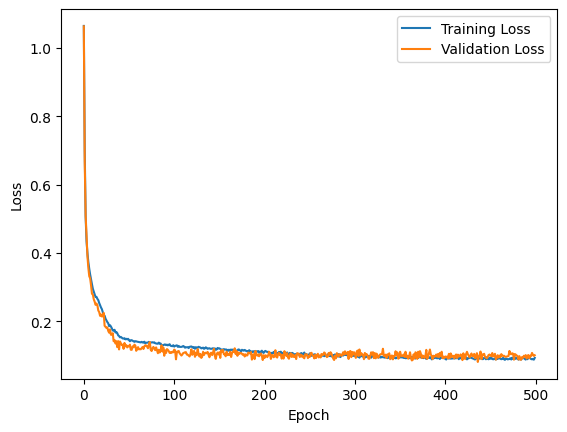

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into train, validation, and test sets
X = data.iloc[:, :7].to_numpy()  # Features
y = data.iloc[:, 7].to_numpy()  # Labels
y = np.reshape(y, (-1, 1))



X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_test_noscale = y_test  # Keep a copy of unscaled y_test for MAPE calculation
x_test_noscale=X_test
# Normalize features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
y_train = scaler2.fit_transform(y_train)
y_val = scaler2.transform(y_val)
y_test = scaler2.transform(y_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(7, 200),
            nn.LeakyReLU(),
            #nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.Linear(200, 1000),
            nn.LeakyReLU(),
            nn.Linear(1000, 200),
            nn.LeakyReLU(),
            nn.Linear(200, 20),
            #nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.LeakyReLU(),
            nn.Linear(20, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(7, 200),
            nn.ReLU(),
            nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.Linear(200, 1000),
             nn.Linear(1000, 2000),
            nn.ReLU(),
            nn.Linear(2000, 200),
            nn.ReLU(),
            nn.Linear(200, 20),
            nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.ReLU(),
            nn.Linear(20, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1),)
    def forward(self, x):
        x = self.layers(x)
        return x

class MLP3(nn.Module): #main model
    def __init__(self):
        super(MLP3, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(7, 100),
            nn.ReLU(),
            #nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200, 20),
            nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.ReLU(),
            nn.Linear(20, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
            x = self.layers(x)
            return x


class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(7, 50),
            nn.ReLU(),
            #nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 20),
            nn.Dropout(p=0.1),  # Add dropout layer with dropout rate of 0.1
            nn.ReLU(),
            nn.Linear(20, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

# Instantiate the model
model = MLP3()
model=model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Assuming regression task
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
batch_size = 50  # Set the batch size

# Training loop
train_losses = []
val_losses = []

for epoch in range(500):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i : i + batch_size]
        batch_y = y_train[i : i + batch_size]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate and store losses for plotting
    with torch.no_grad():
        train_loss = criterion(model(X_train), y_train)
        val_loss = criterion(model(X_val), y_val)
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    # Print the loss every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
test_outputs = model(X_test).to(device)
test_loss = criterion(test_outputs, y_test)
print(f"Test Loss: {test_loss.item():.4f}")

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

    # Unscale the predictions
    test_outputs_unscaled = scaler2.inverse_transform(test_outputs.cpu().numpy())

    # Calculate MAPE using unscaled values

    mae = np.mean(np.abs((y_test_noscale - test_outputs_unscaled)))
    print(f"MAE: {mae:.4f}")

# Plot the training and validation loss curves
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Mean Absolute Error: 0.2779
Mean Squared Error: 0.2106
R-squared Score: 0.9025
Mean Absolute Percentage Error: 22.9415%


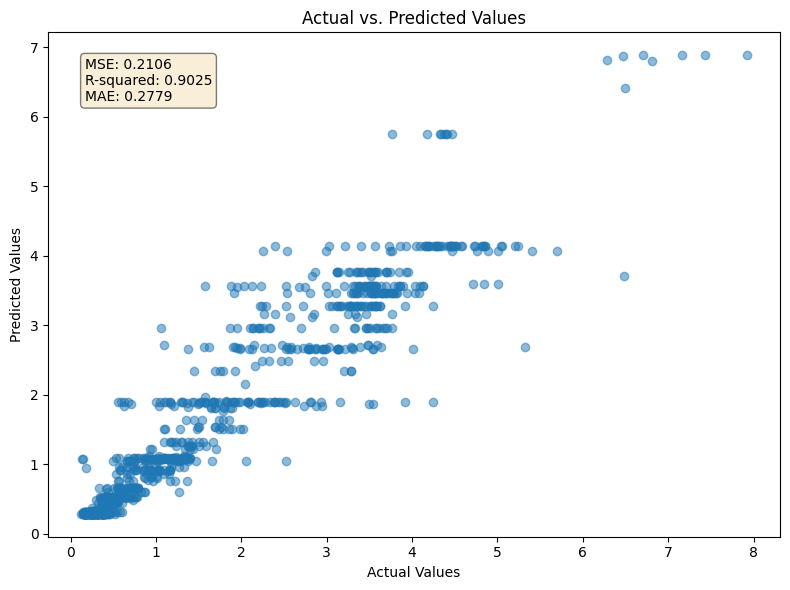

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Load data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into features and labels
X = data.iloc[:, :7].to_numpy()  # Features
y = data.iloc[:, 7].to_numpy().reshape(-1, 1)  # Labels

# Evaluate model
model.eval()
X_test = scaler.transform(X)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)

with torch.no_grad():
    test_outputs = model(X_test)

    # Unscale predictions
    test_outputs_unscaled = scaler2.inverse_transform(test_outputs.cpu().numpy())

    # Calculate evaluation metrics
    mse = np.mean((test_outputs_unscaled - y)**2)
    r2 = 1 - (np.sum((test_outputs_unscaled - y)**2) / np.sum((y - np.mean(y))**2))
    mape = np.mean(np.abs((y - test_outputs_unscaled) / y)) * 100
    mae = np.mean(np.abs((y - test_outputs_unscaled)))

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}%")

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(y, test_outputs_unscaled, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add textbox with evaluation metrics
textstr = f'MSE: {mse:.4f}\nR-squared: {r2:.4f}\nMAE: {mae:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Mean Squared Error: 0.1912
R-squared Score: 0.9115
MAPE: 22.4851%


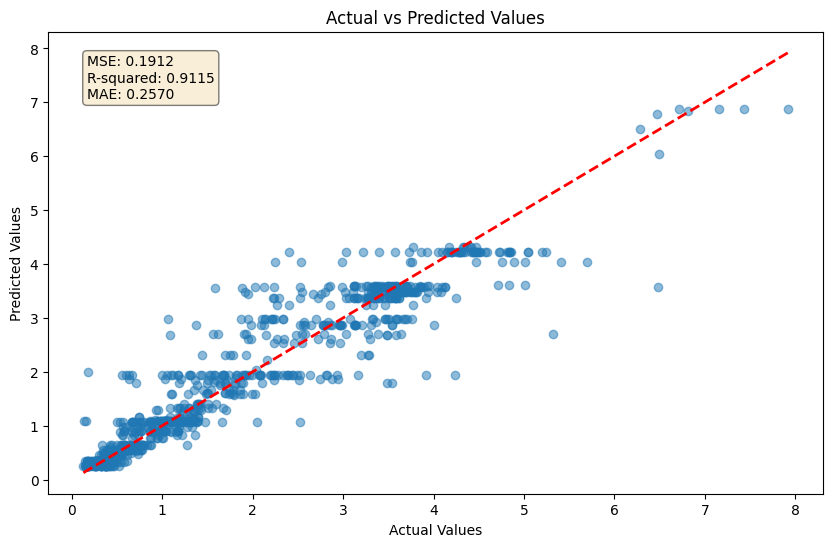

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Set the style
plt.style.use('default')



# Load and preprocess data
data = pd.read_excel("/content/peak5.xlsx")
X = data.iloc[:, :7].to_numpy()  # Features
y = data.iloc[:, 7].to_numpy().reshape(-1, 1)  # Labels

# Assuming scaler, scaler2, model, and device are already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evaluate_model(model, X, y, scaler, scaler2, device):
    model.eval()
    X_scaled = scaler.transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

    with torch.no_grad():
        outputs = model(X_tensor)
        outputs_unscaled = scaler2.inverse_transform(outputs.cpu().numpy())

    mse = np.mean((outputs_unscaled - y)**2)
    r2 = 1 - (np.sum((outputs_unscaled - y)**2) / np.sum((y - np.mean(y))**2))
    mape = np.mean(np.abs((y - outputs_unscaled) / y)) * 100
    mae = np.mean(np.abs((y - test_outputs_unscaled)))
    return outputs_unscaled, mse, r2, mape

def plot_results(y_true, y_pred, mse, r2, mape):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")

    textstr = f'MSE: {mse:.4f}\nR-squared: {r2:.4f}\nMAE: {mae:.4f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    plt.show()

# Evaluate the model
predictions, mse, r2, mape = evaluate_model(model, X, y, scaler, scaler2, device)

# Print metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"MAPE: {mape:.4f}%")

# Plot results
plot_results(y, predictions, mse, r2, mape)

In [ ]:
y.shape


torch.Size([1034, 1])

In [ ]:
X

tensor([[-0.2565,  0.1779,  0.2968,  ..., -0.9206, -1.4760, -0.4398],
        [-0.2565,  0.1779,  0.2968,  ..., -0.9206, -1.4760, -0.4398],
        [-0.2565,  0.1779,  0.2968,  ..., -0.9206, -1.4760, -0.4398],
        ...,
        [-0.8997,  0.7241, -0.8766,  ...,  0.1429,  0.7968,  1.1504],
        [-0.8997,  0.7241, -0.8766,  ...,  0.1429,  0.7968,  1.1504],
        [-0.8997,  0.7241, -0.8766,  ...,  0.1429,  0.7968,  1.1504]])

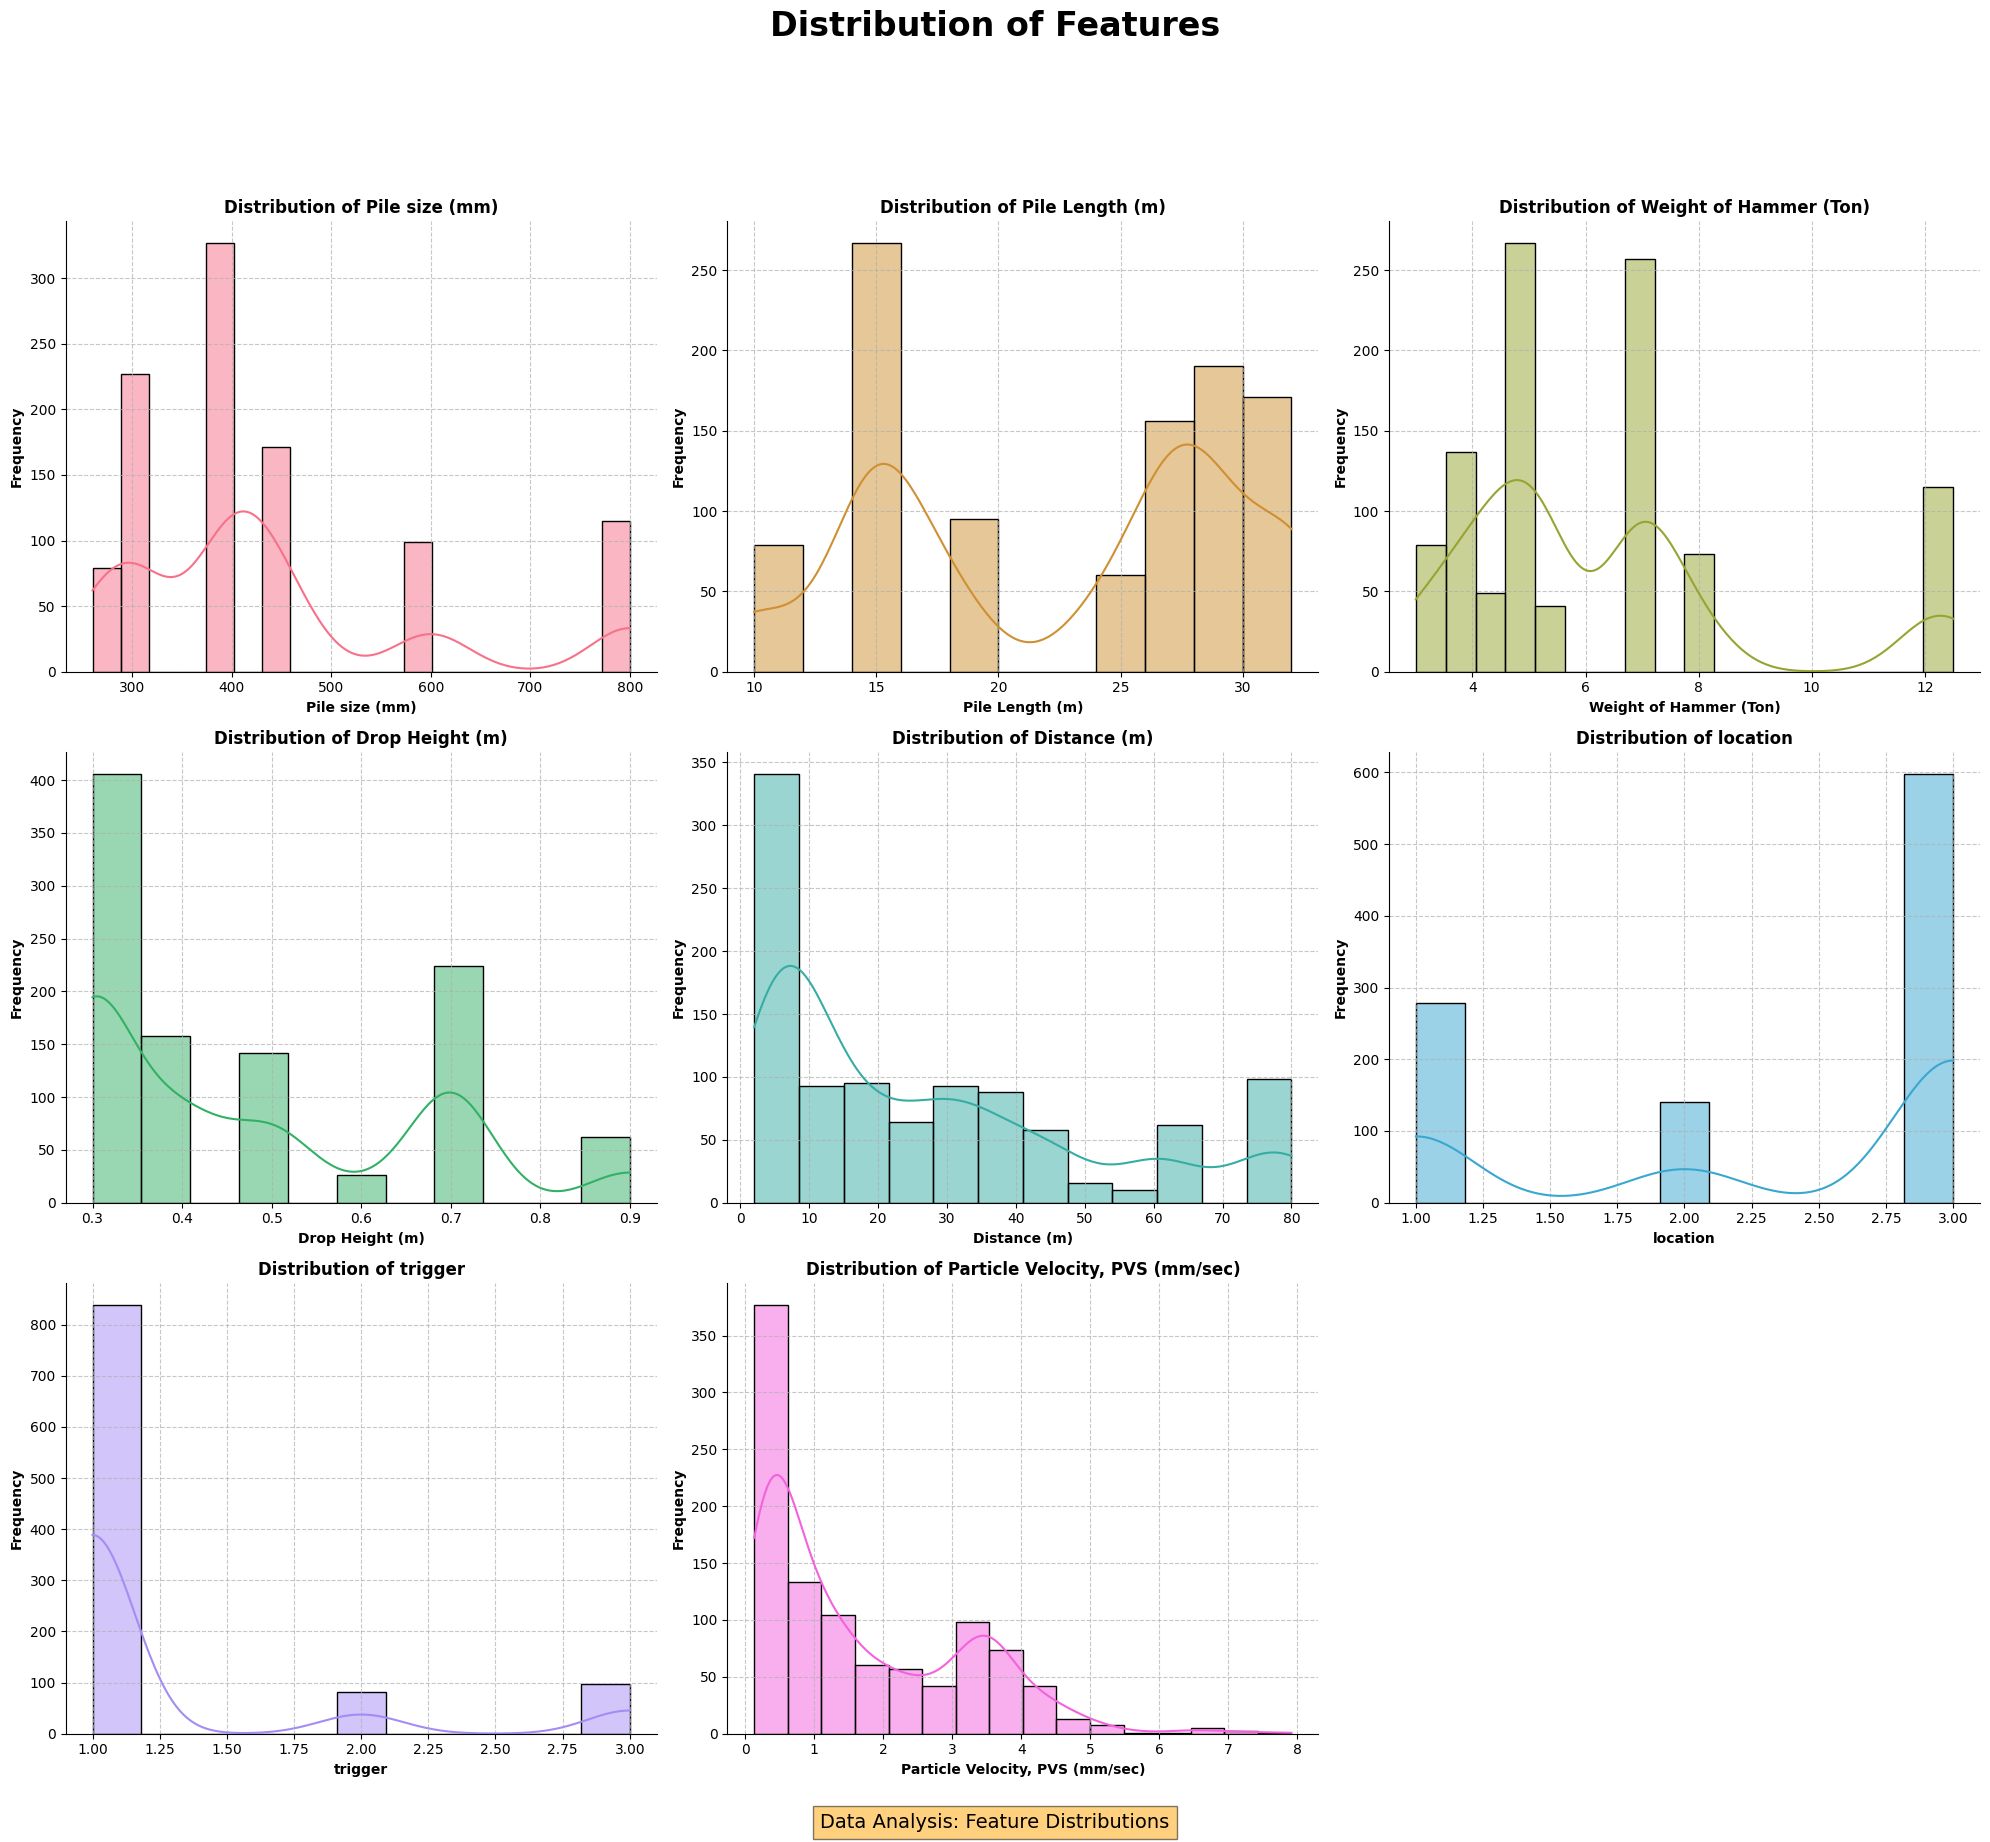

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed for the subplots
num_features = data.shape[1]  # Include the target variable
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Set a cohesive style for the plots
plt.style.use('default')
color_palette = sns.color_palette("husl", num_features)

# Plot the distribution of each feature, including the target variable
for i, feature in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(data[feature], ax=ax, kde=True, color=color_palette[i], edgecolor='black')
    ax.set_xlabel(feature, fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')

    # Add some artistic touches
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Add an overall title with artistic styling
fig.suptitle("Distribution of Features", fontsize=24, fontweight='bold', y=1.02)

# Adjust the layout and add a background color
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.patch.set_facecolor('#F0F0F0')

# Add a text box with some information
plt.figtext(0.5, 0.01, "Data Analysis: Feature Distributions",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show()

In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer: 1019it [00:22, 29.10it/s]                          


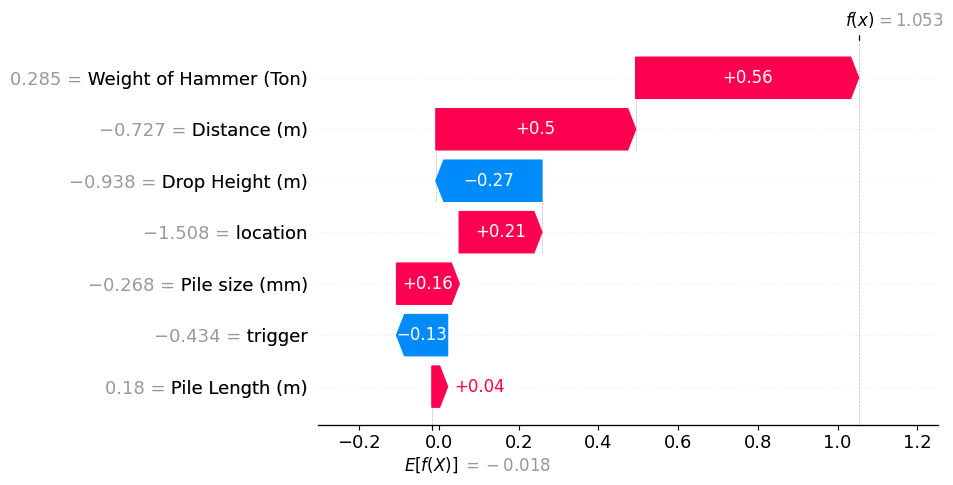

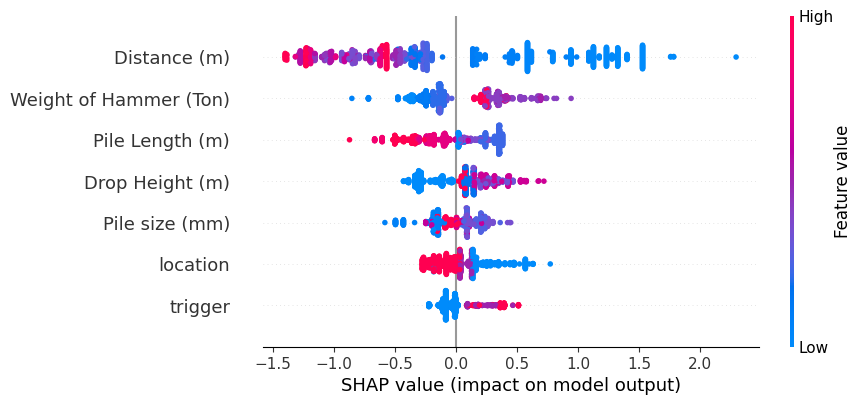

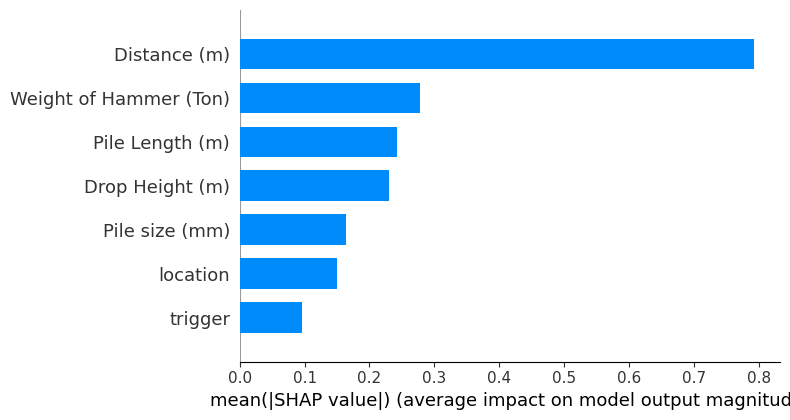

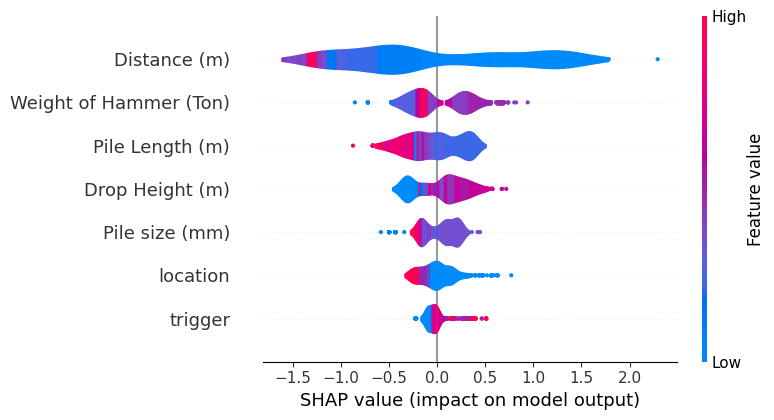

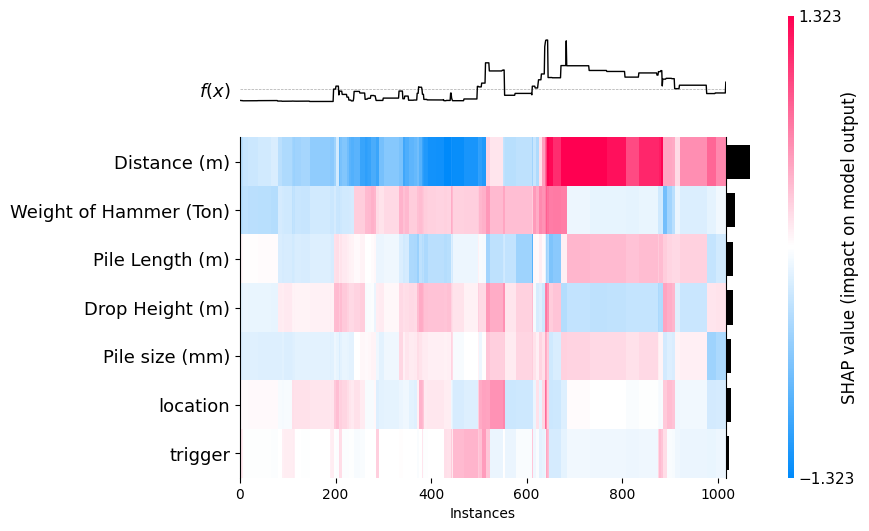

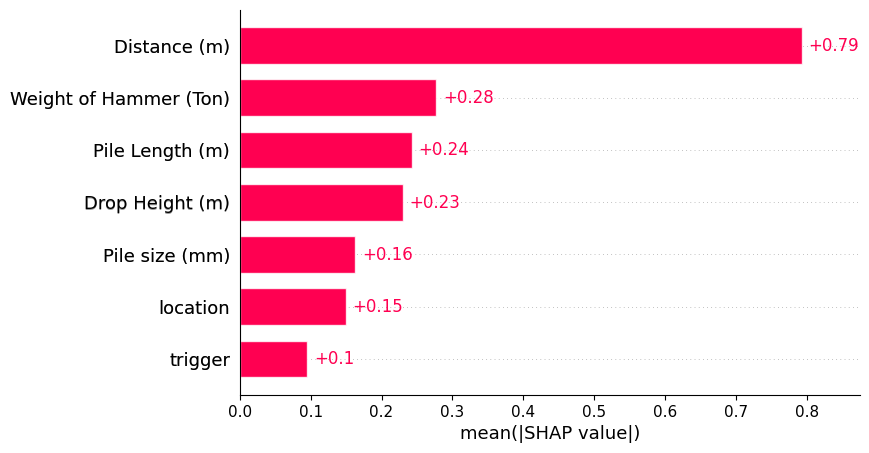

<Figure size 1200x800 with 0 Axes>

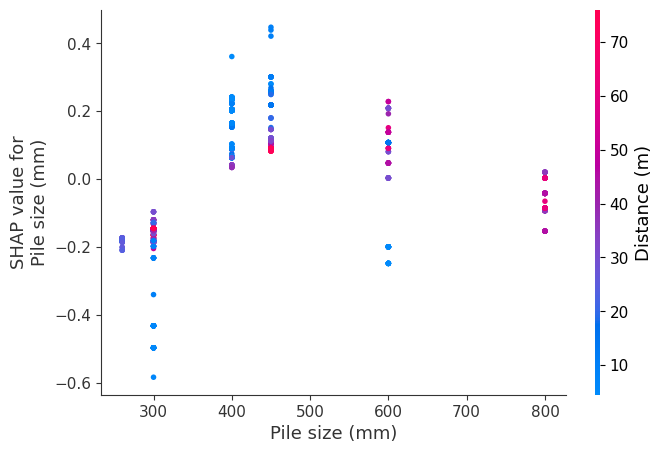

<Figure size 1200x800 with 0 Axes>

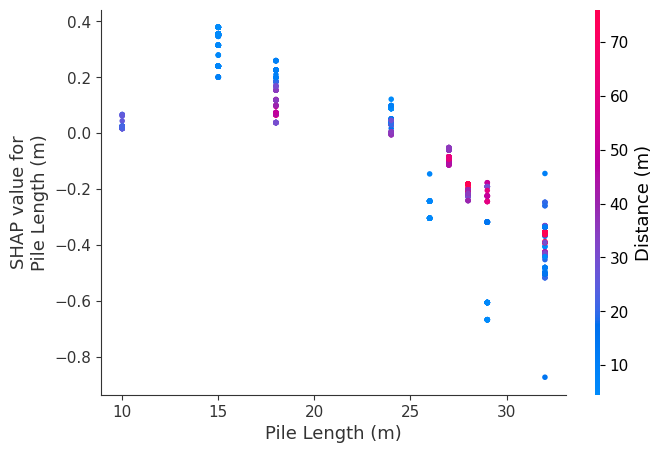

<Figure size 1200x800 with 0 Axes>

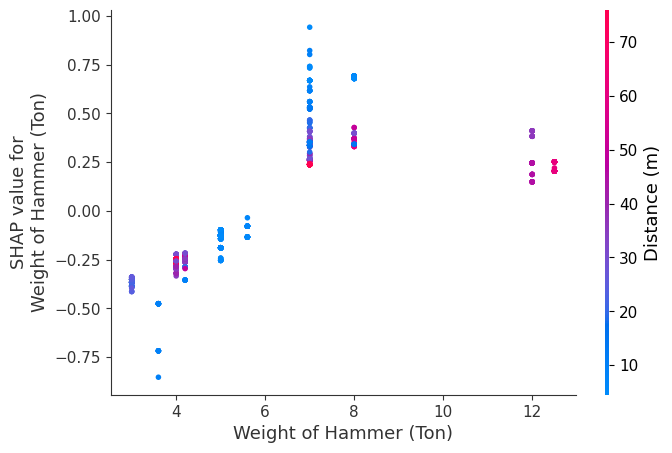

<Figure size 1200x800 with 0 Axes>

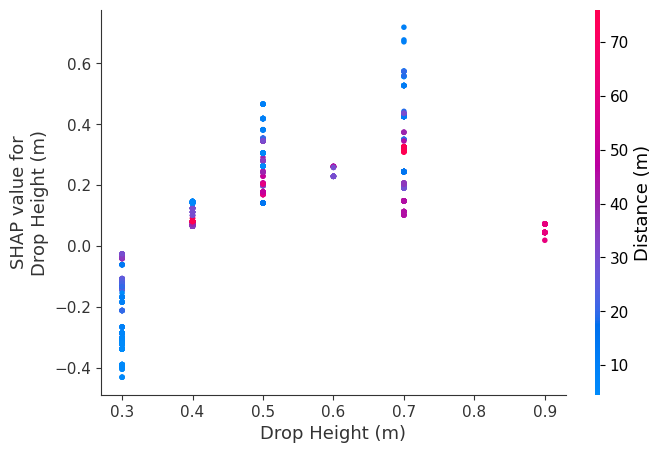

<Figure size 1200x800 with 0 Axes>

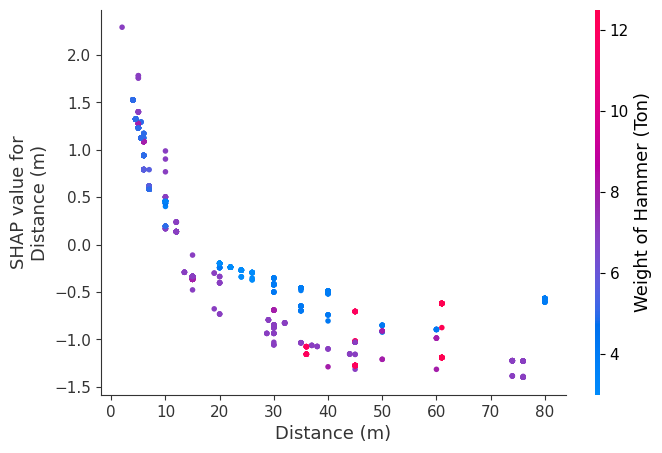

<Figure size 1200x800 with 0 Axes>

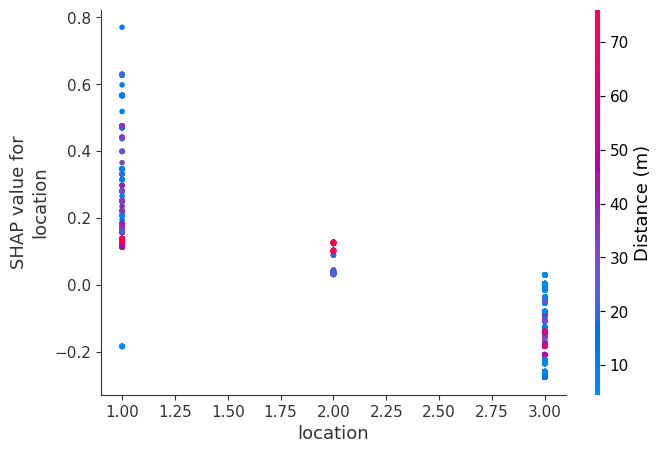

<Figure size 1200x800 with 0 Axes>

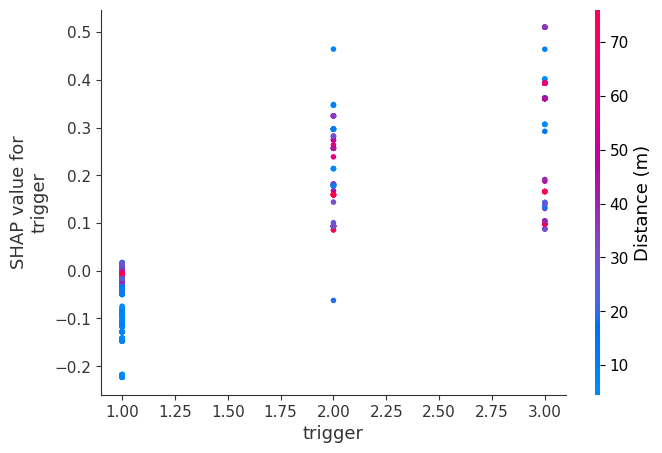

In [6]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import shap

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into features and labels
X = data.iloc[:, :7]  # Features
y = data.iloc[:, 7].to_numpy().reshape(-1, 1)  # Labels

# Assuming scaler and model are defined elsewhere
X_train_scaled = scaler.transform(X)
X_train_original = X  # Use the original, unscaled values

# Define prediction function for SHAP
def f(X):
    return model(torch.tensor(X, dtype=torch.float32).to(device)).cpu().detach().numpy()

# Get feature names
feature_names = X.columns.tolist()

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(f, X_train_scaled, feature_names=feature_names)
shap_values = explainer(X_train_scaled)

# Waterfall plot for a single prediction
plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap_values[10], max_display=14)

# Beeswarm plot
plt.figure(figsize=(12, 8))
shap.plots.beeswarm(shap_values)

# SHAP summary plot (bar plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_original, plot_type="bar")

# SHAP summary plot (violin plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_original, plot_type="violin")

# Heatmap
shap.plots.heatmap(shap_values)

shap.plots.bar(shap_values)
# Dependence plots with real values
for feature in feature_names:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(
        feature,
        shap_values.values,
        X_train_original,
        feature_names=feature_names
    )

In [ ]:
  !pip install shap

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import shap

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into features and labels
X = data.iloc[:, :7]  # Features
y = data.iloc[:, 7].to_numpy().reshape(-1, 1)  # Labels

# Assuming scaler and model are defined elsewhere
X_train_scaled = scaler.transform(X)
X_train_original = X  # Use the original, unscaled values

# Define prediction function for SHAP
def f(X):
    return model(torch.tensor(X, dtype=torch.float32).to(device)).cpu().detach().numpy()

# Get feature names
feature_names = X.columns.tolist()

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(f, X_train_scaled, feature_names=feature_names)
shap_values = explainer(X_train_scaled)

# Increase font size globally
plt.rcParams.update({'font.size': 14})

# Waterfall plot for a single prediction
plt.figure(figsize=(14, 10))
shap.plots.waterfall(shap_values[10], max_display=14)
plt.title("Waterfall Plot", fontsize=20)
plt.show()

# Beeswarm plot
plt.figure(figsize=(14, 10))
shap.plots.beeswarm(shap_values)
plt.title("Beeswarm Plot", fontsize=20)
plt.show()

# SHAP summary plot (bar plot)
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_train_original, plot_type="bar")
plt.title("SHAP Summary Plot (Bar)", fontsize=20)
plt.show()

# SHAP summary plot (violin plot)
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_train_original, plot_type="violin")
plt.title("SHAP Summary Plot (Violin)", fontsize=20)
plt.show()

# Heatmap
plt.figure(figsize=(14, 10))
shap.plots.heatmap(shap_values)
plt.title("SHAP Heatmap", fontsize=20)
plt.show()

# Dependence plots with real values in 2 columns
num_features = len(feature_names)
num_rows = (num_features + 1) // 2  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(24, 8*num_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    shap.dependence_plot(
        feature,
        shap_values.values,
        X_train_original,
        feature_names=feature_names,
        ax=axes[i],
        show=False
    )
    axes[i].set_title(feature, fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
    axes[i].xaxis.label.set_size(20)
    axes[i].yaxis.label.set_size(20)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle("SHAP Dependence Plots", fontsize=24, y=1.02)
plt.show()

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py)

ExactExplainer explainer: 1019it [00:22, 31.86it/s]                          


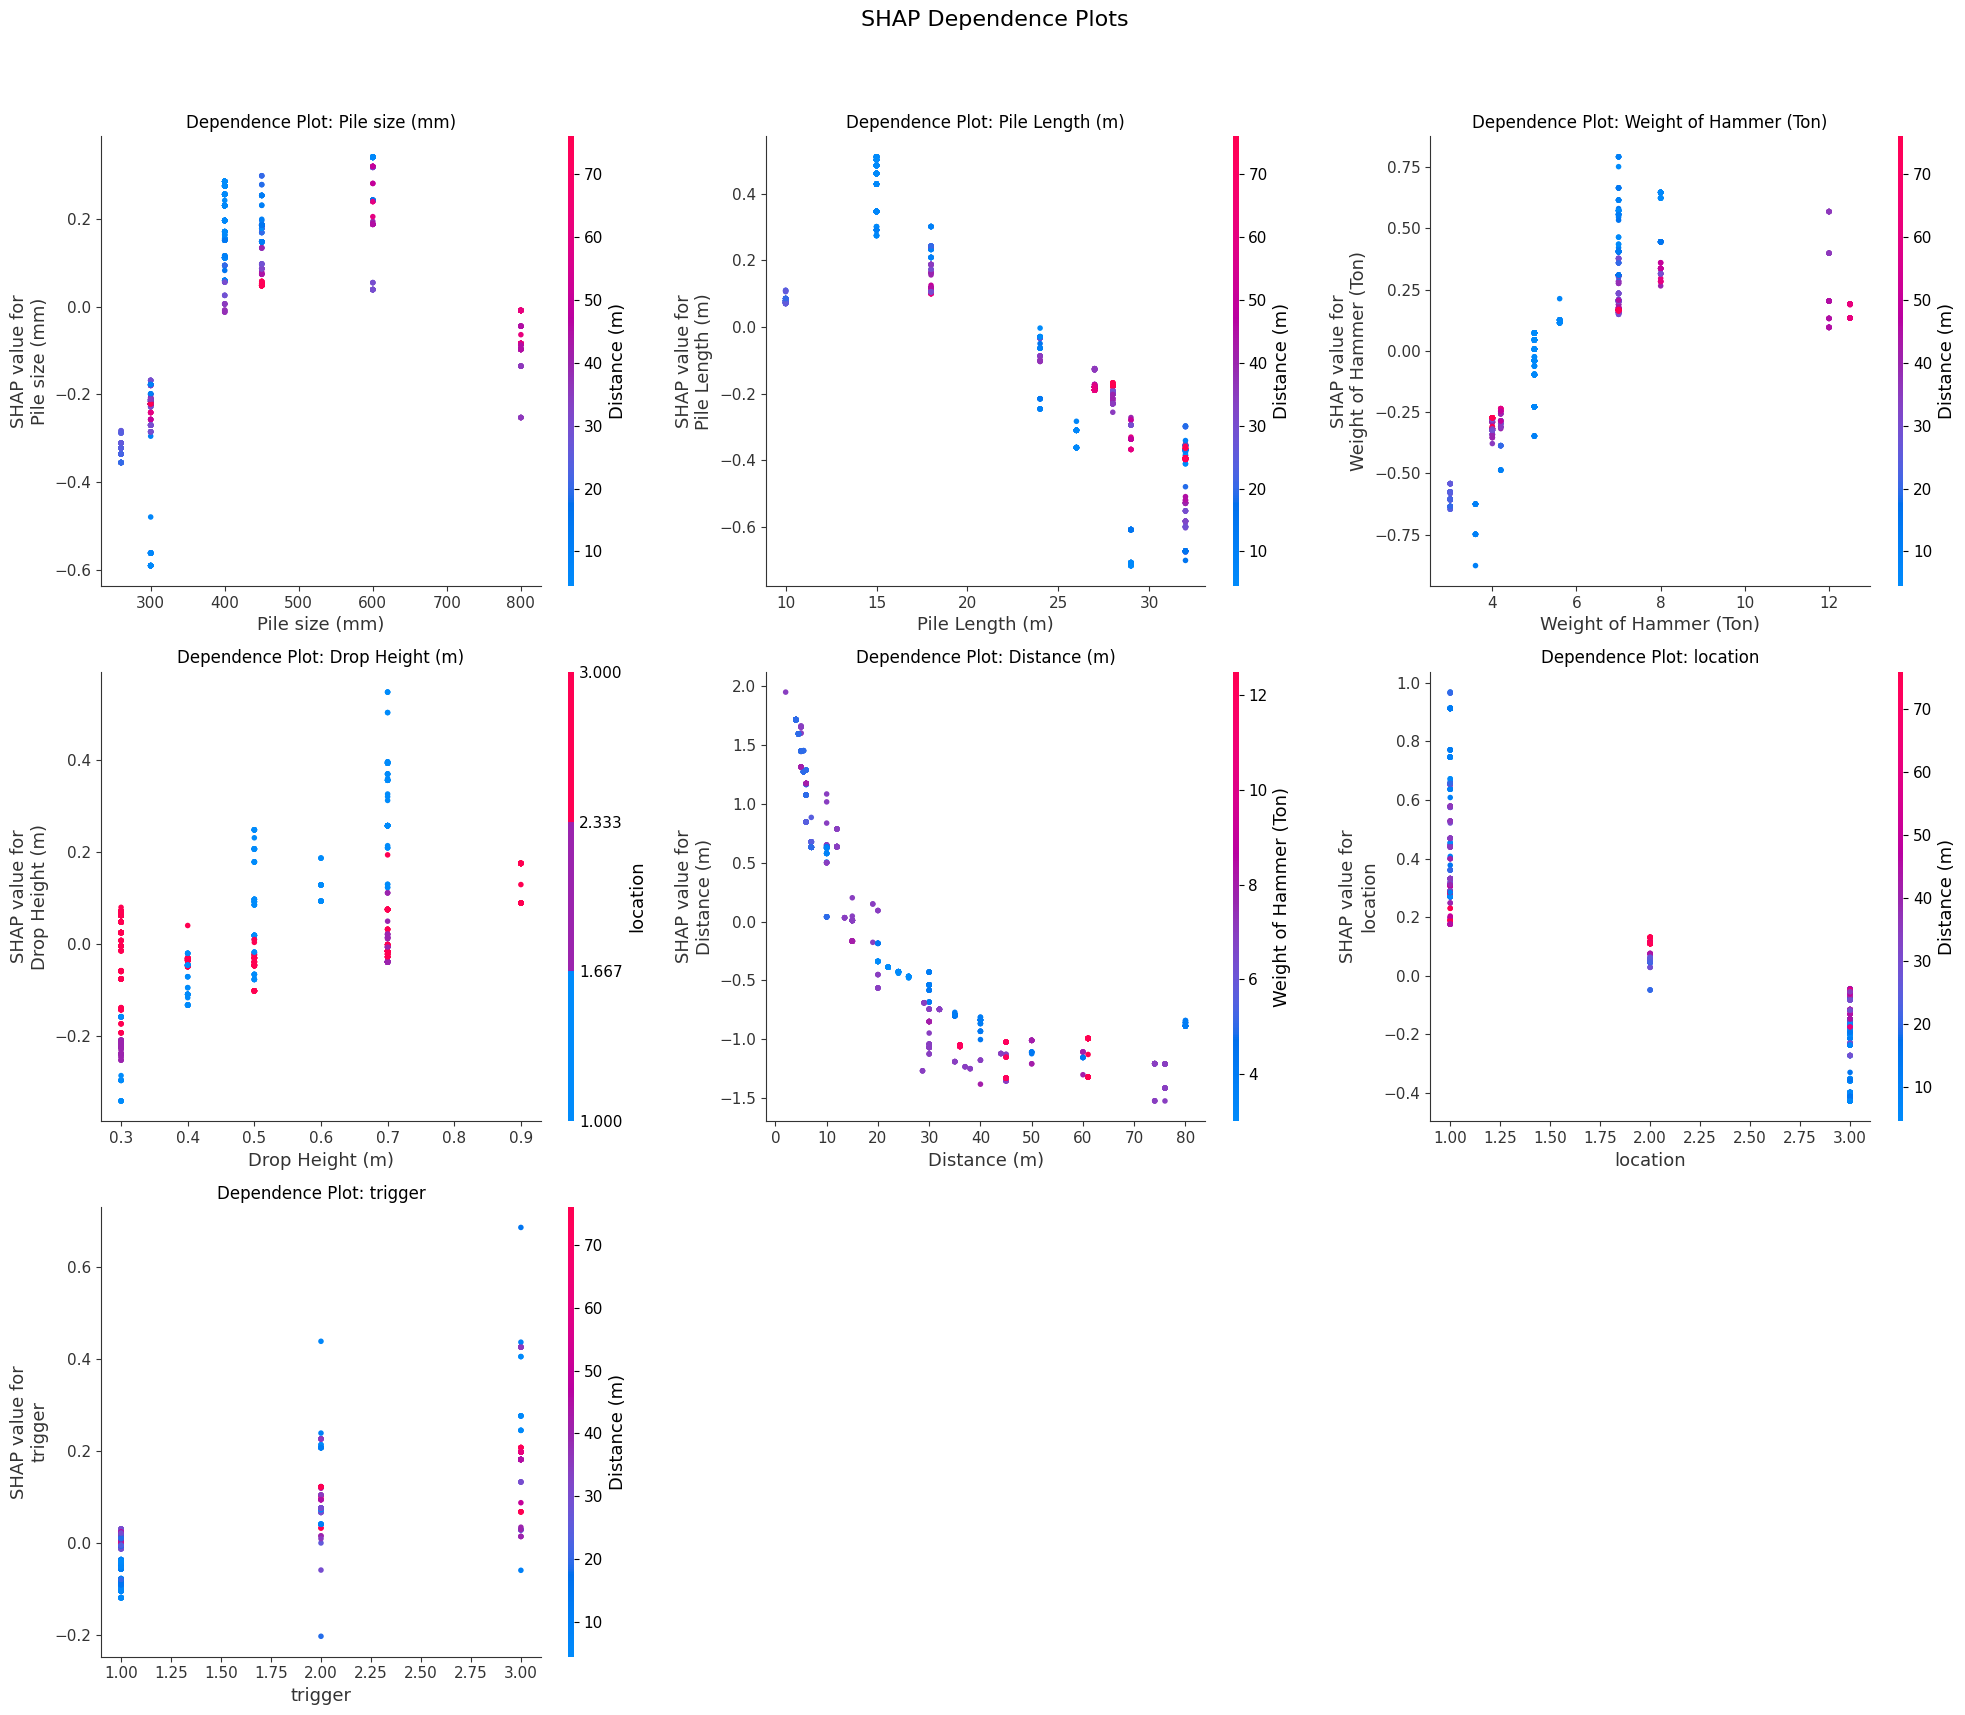

In [ ]:
import shap
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into features and labels
X = data.iloc[:, :7]  # Features
y = data.iloc[:, 7].to_numpy().reshape(-1, 1)  # Labels

# Assuming you have already defined and trained your model, and 'device' is set
# If not, you'll need to add those steps here

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_original = X  # Use the original, unscaled values

# Define the model prediction function
def f(X):
    return model(torch.tensor(X, dtype=torch.float32).to(device)).cpu().detach().numpy()

# Get feature names
feature_names = X.columns.tolist()

# Create SHAP explainer
explainer = shap.Explainer(f, X_train_scaled, feature_names=feature_names)
shap_values = explainer(X_train_scaled)

# Create dependence plots in a 3-column layout
n_features = len(feature_names)
n_rows = (n_features + 2) // 3  # Round up to the nearest integer

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
fig.suptitle("SHAP Dependence Plots", fontsize=16)

for i, feature in enumerate(feature_names):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    shap.dependence_plot(
        feature,
        shap_values.values,
        X_train_original,
        ax=ax,
        show=False
    )
    ax.set_title(f"Dependence Plot: {feature}")

# Remove any unused subplots
for i in range(n_features, n_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
X_train_scaled.shape

AttributeError: 'tuple' object has no attribute 'shape'

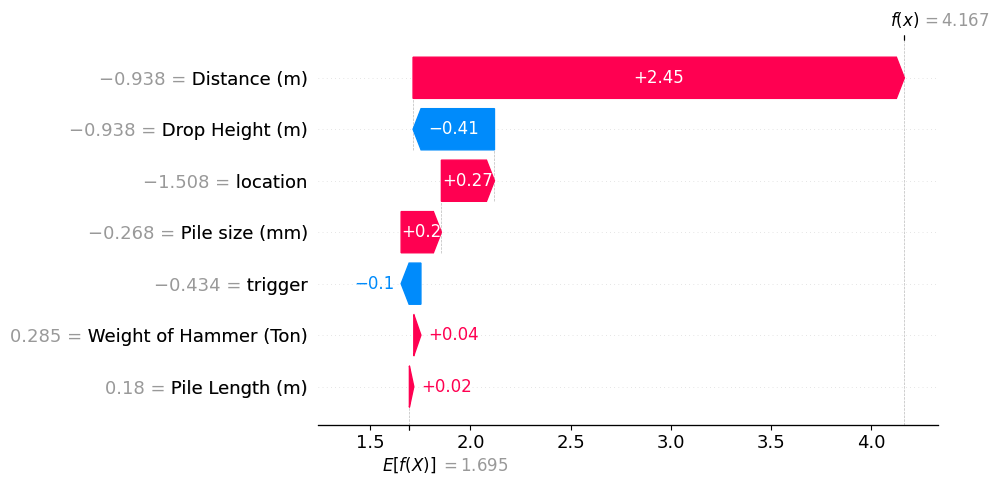

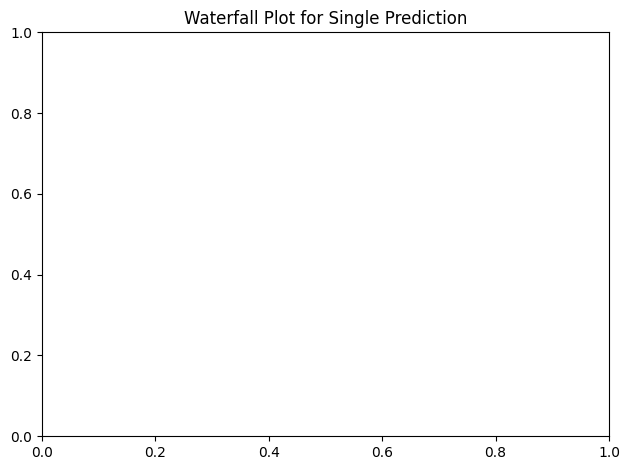

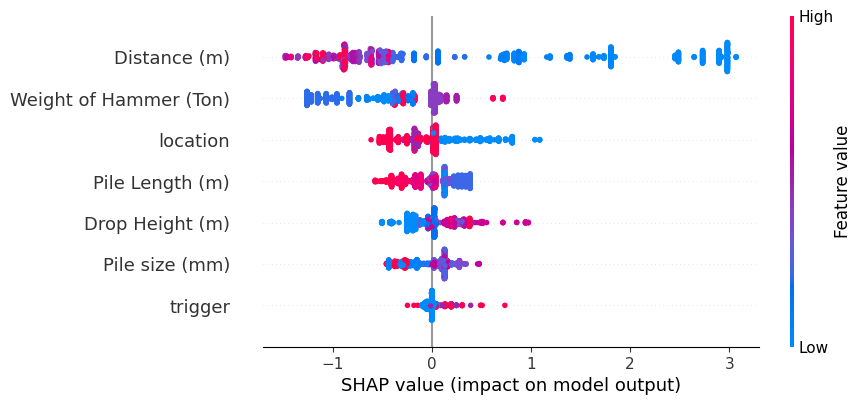

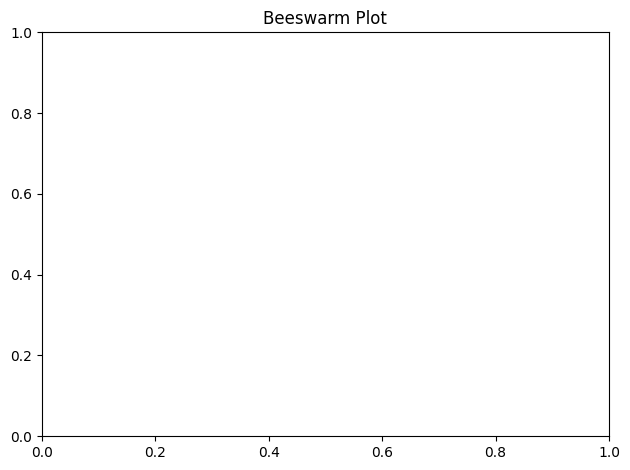

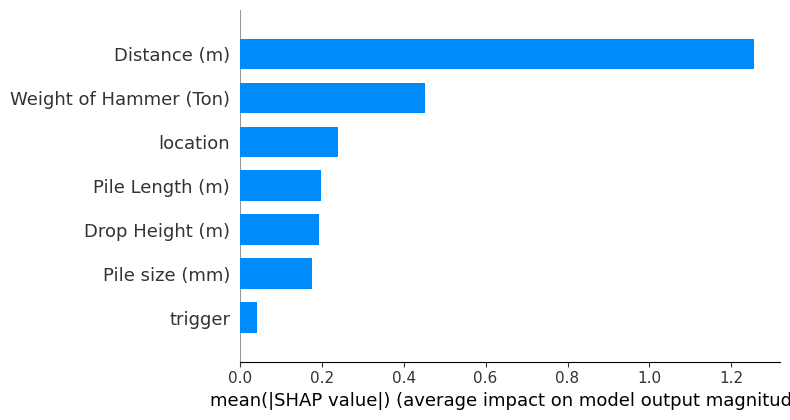

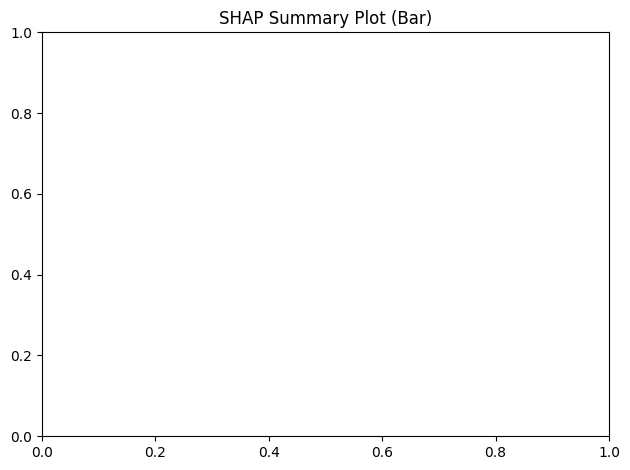

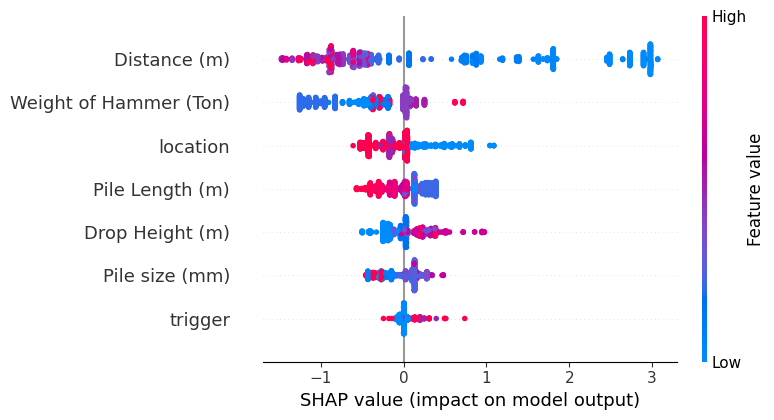

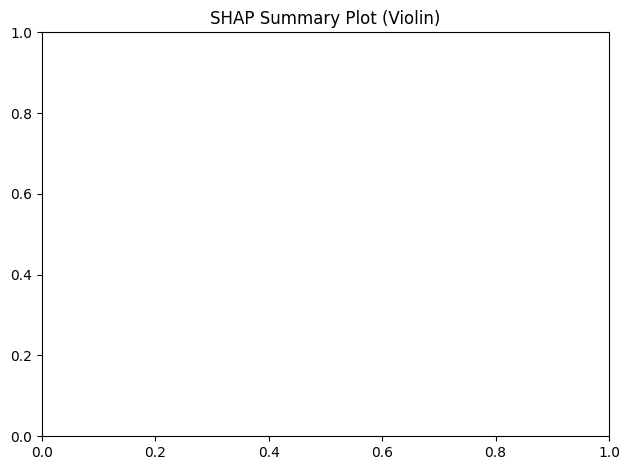

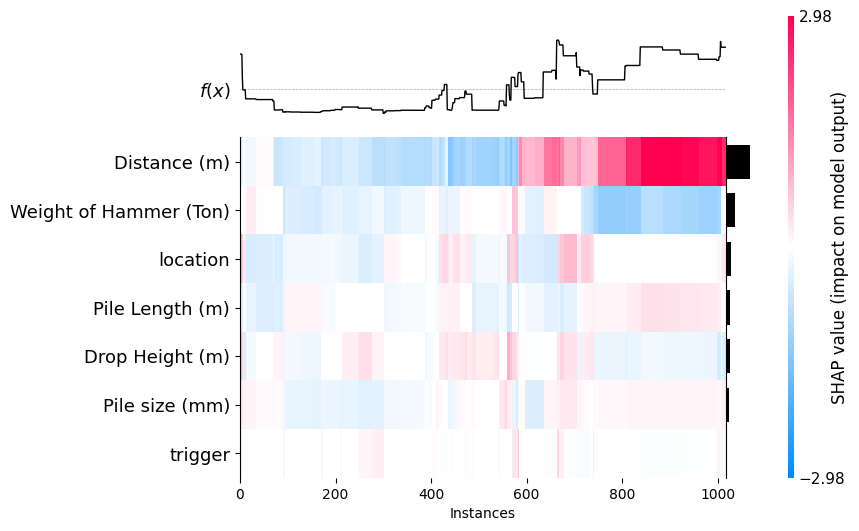

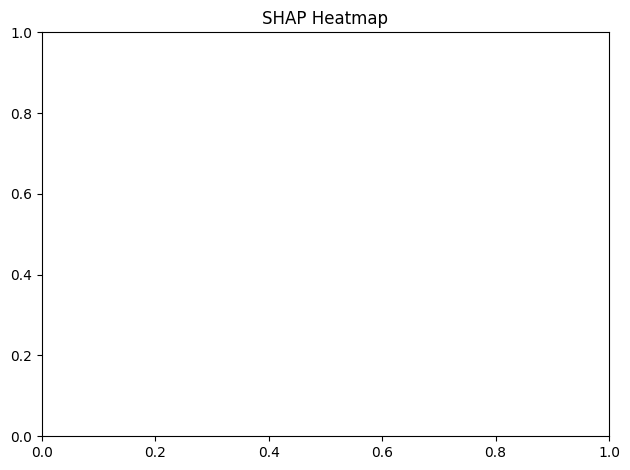

In [ ]:
import shap
import torch
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X_train = torch.tensor(scaler.transform(X), dtype=torch.float32)

# Define a function to make predictions
def f(X):
    return model(torch.tensor(X, dtype=torch.float32).to(device)).cpu().detach().numpy()

# Get feature names
feature_names = data.columns[:7].tolist()

# Create the DeepExplainer
background = X_train[:100]  # Use the first 100 samples as the background
explainer = shap.DeepExplainer(model, background)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train.cpu())

# Check if shap_values is a list (for multi-output models)
if isinstance(shap_values, list):
    print(f"Multi-output model detected. Number of outputs: {len(shap_values)}")
    # For this example, we'll use the first output
    shap_values = shap_values[0]

# Ensure shap_values and X_test have compatible shapes
if shap_values.shape[1:] != X_test.shape[1:]:
    print("Warning: Shape mismatch. Attempting to reshape shap_values.")
    shap_values = shap_values.reshape(X_train.shape)

# Convert to numpy for consistency
#X_test_np = X_test.cpu().numpy()

# Waterfall plot for a single prediction
plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value[0] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                                      data=X_test_np[0],
                                      feature_names=feature_names))
plt.title("Waterfall Plot for Single Prediction")
plt.tight_layout()
plt.show()

# Beeswarm plot
plt.figure(figsize=(12, 8))
shap.plots.beeswarm(shap.Explanation(values=shap_values,
                                     base_values=explainer.expected_value[0] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                                     data=X_test_np,
                                     feature_names=feature_names))
plt.title("Beeswarm Plot")
plt.tight_layout()
plt.show()

# SHAP summary plot (bar plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_np, plot_type="bar", feature_names=feature_names)
plt.title("SHAP Summary Plot (Bar)")
plt.tight_layout()
plt.show()

# SHAP summary plot (violin plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_np, feature_names=feature_names)
plt.title("SHAP Summary Plot (Violin)")
plt.tight_layout()
plt.show()

# Heatmap plot
plt.figure(figsize=(12, 8))
shap.plots.heatmap(shap.Explanation(values=shap_values,
                                    base_values=explainer.expected_value[0] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                                    data=X_test_np,
                                    feature_names=feature_names))
plt.title("SHAP Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have your model, data, X_train, X_test, and device defined

# Create and fit a scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def f(X):
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    predictions = model(X_tensor).cpu().detach().numpy()
    return predictions

# Get feature names
feature_names = data.columns[:7].tolist()

# Create the explainer using scaled data
explainer = shap.Explainer(f, X_train_scaled, feature_names=feature_names)

# Calculate SHAP values for scaled test data
shap_values = explainer(X_test_scaled)

# Keep SHAP values scaled, but use original feature values for plotting
X_test_original = X_test.cpu().numpy()

# Waterfall plot for a single prediction
plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap_values[10], max_display=14, show=False)

# Get the current axis
ax = plt.gca()

# Get the current x-tick positions and labels
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

# Create new labels in the original scale
new_labels = []
for tick, label in zip(xticks, xticklabels):
    feature_index = feature_names.index(label.get_text().split('=')[0].strip())
    original_value = tick / scaler.scale_[feature_index] + scaler.mean_[feature_index]
    new_labels.append(f"{label.get_text().split('=')[0].strip()} = {original_value:.2f}")

# Set the new labels
ax.set_xticklabels(new_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Beeswarm plot
plt.figure(figsize=(12, 8))
shap.plots.beeswarm(shap_values)

# SHAP summary plot (bar plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_original, plot_type="bar")

# SHAP summary plot (violin plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_original)

# SHAP heatmap
plt.figure(figsize=(12, 8))
shap.plots.heatmap(shap_values)

# SHAP dependence plot
for feature in feature_names:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(
        feature,
        shap_values.values,
        X_test_original,
        feature_names=feature_names,
        x_jitter=0.1,
        alpha=0.5
    )
    plt.xlabel(f"{feature} (original scale)")
    plt.ylabel("SHAP value (scaled)")
    plt.tight_layout()
    plt.show()

ValueError: '$f(x)$' is not in list

In [ ]:
# Assuming you have these variables defined:
# X_test: Your test data (scaled)
# X_test_original: Your test data (before scaling)
# shap_values: SHAP values for your model
# feature_names: List of feature names
# scaler: Your StandardScaler object

# Function to inverse transform a single feature
def inverse_transform_feature(feature_values, feature_index, scaler):
    feature_values_2d = feature_values.reshape(-1, 1)
    inverse_transformed = scaler.inverse_transform(np.zeros((len(feature_values), scaler.n_features_in_)))
    inverse_transformed[:, feature_index] = feature_values
    return inverse_transformed[:, feature_index]

# Plot SHAP dependence plots with original feature values
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(12, 8))

    # Get the original feature values
    original_values = X_test_original[:, i]

    # Create a modified shap_values object with original feature values
    modified_shap_values = shap.Explanation(
        values=shap_values.values,
        base_values=shap_values.base_values,
        data=X_test_original,
        feature_names=feature_names
    )

    # Plot the dependence plot
    shap.dependence_plot(
        feature,
        modified_shap_values,
        X_test_original,
        feature_names=feature_names,
        ax=plt.gca()
    )

    plt.title(f"SHAP Dependence Plot for {feature} (Original Values)")
    plt.xlabel(f"{feature} (Original Scale)")
    plt.show()

NameError: name 'X_test_original' is not defined

In [ ]:
!pip install LIME

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=73744c7064fb081ac16f4ba9863bd8c9c0a52490146a78c35a555ba313da0dd6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built LIME


Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.axis.XAxis'>
Couldn't copy element of type <class 'matplotlib.axis.YAxis'>
Couldn't copy element of type <class 'matplotlib.text.Text'>
Couldn't copy element of type <class 'matplotlib.text.Text'>
Couldn't copy element of type <class 'matplotlib.text.Text'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.spines.Spine'>
Couldn't copy element of type <class 'matplotlib.axis.XAxis'>
Couldn't copy element of type <class 'matplotlib.axis.YAxis'>
Couldn't copy element of type <class 'matplotlib.text.Tex

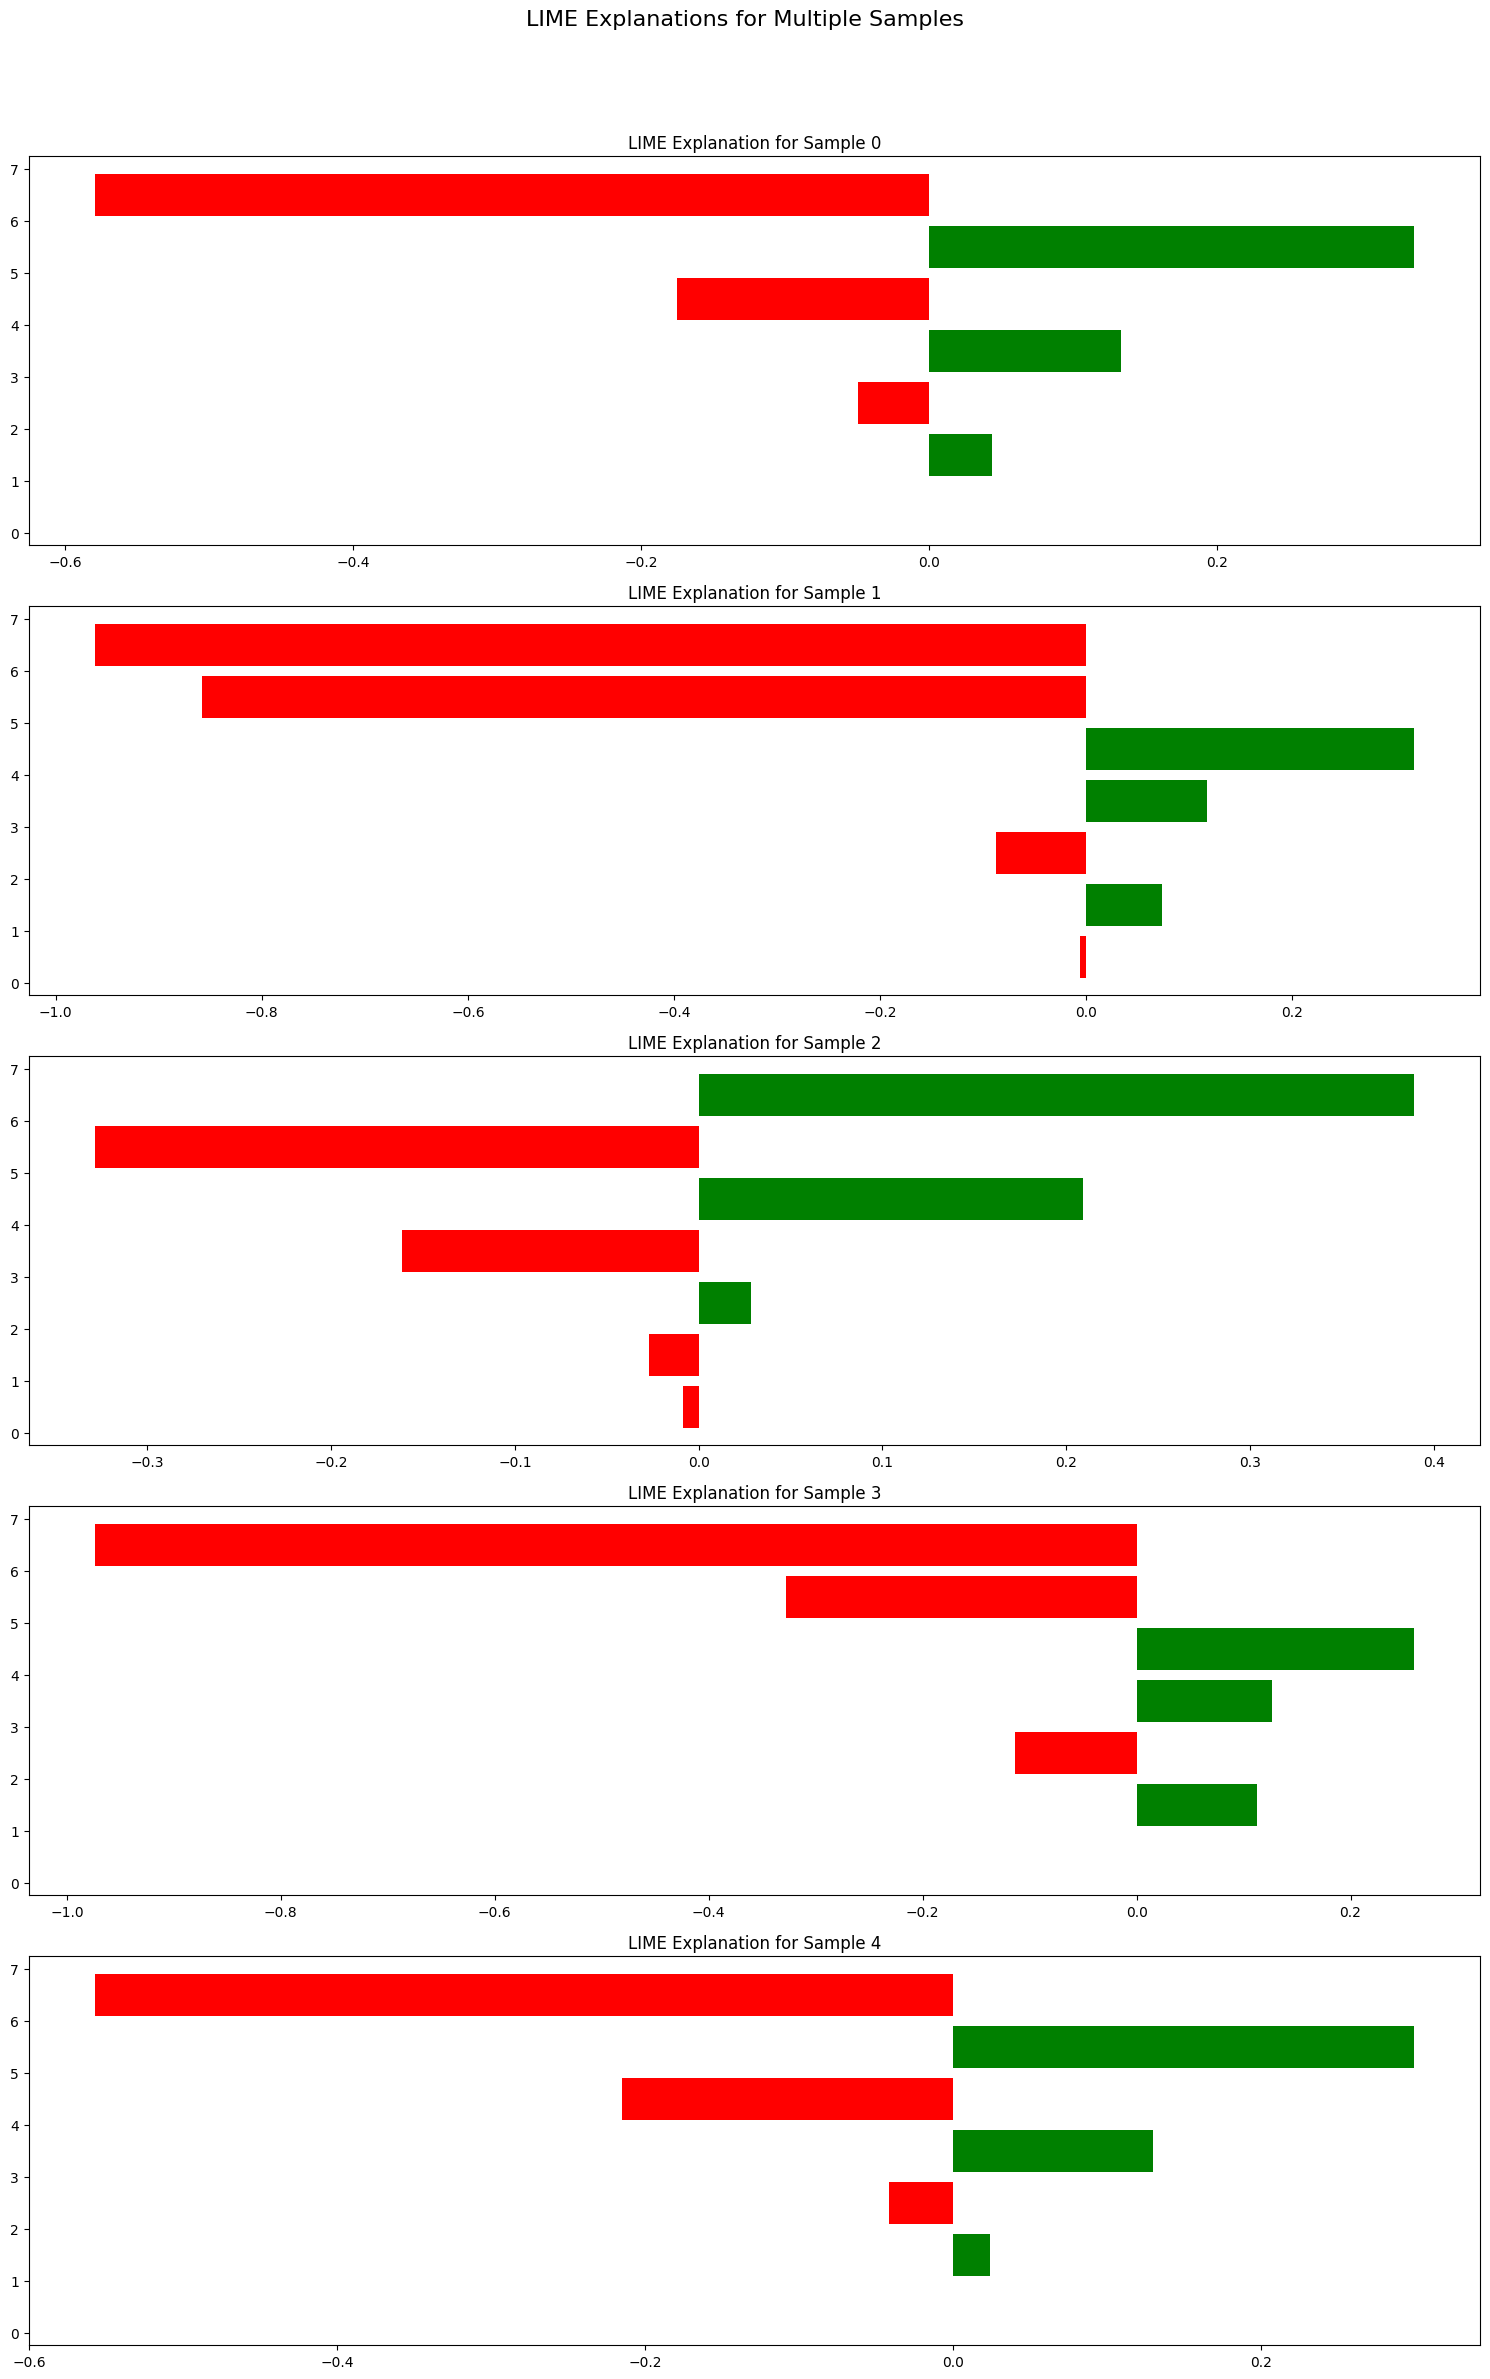

<Figure size 640x480 with 0 Axes>

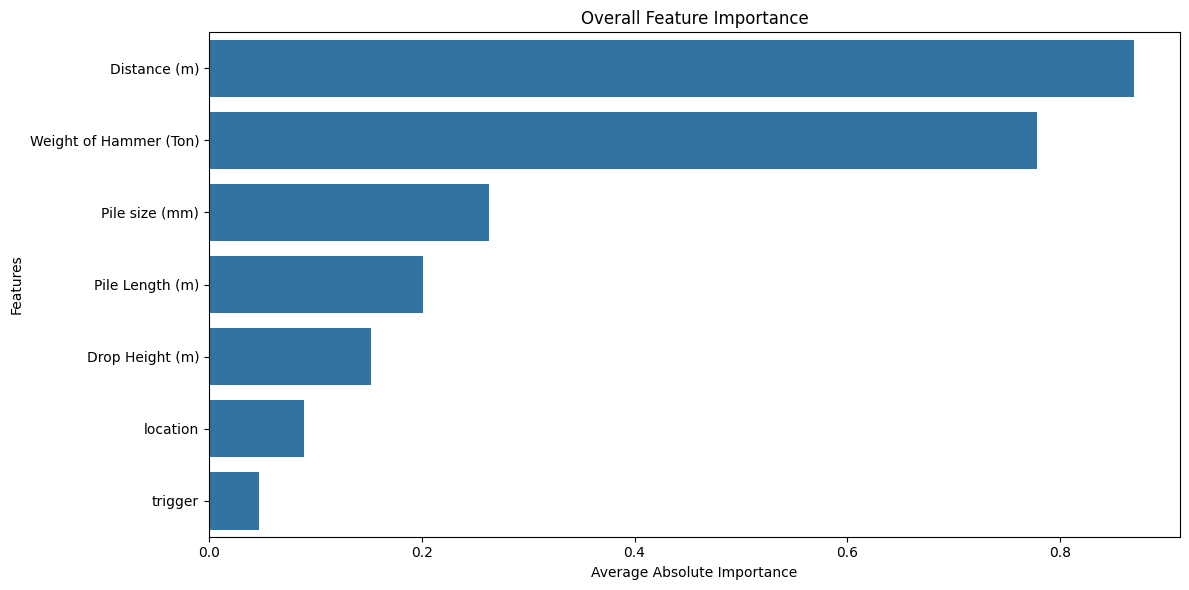

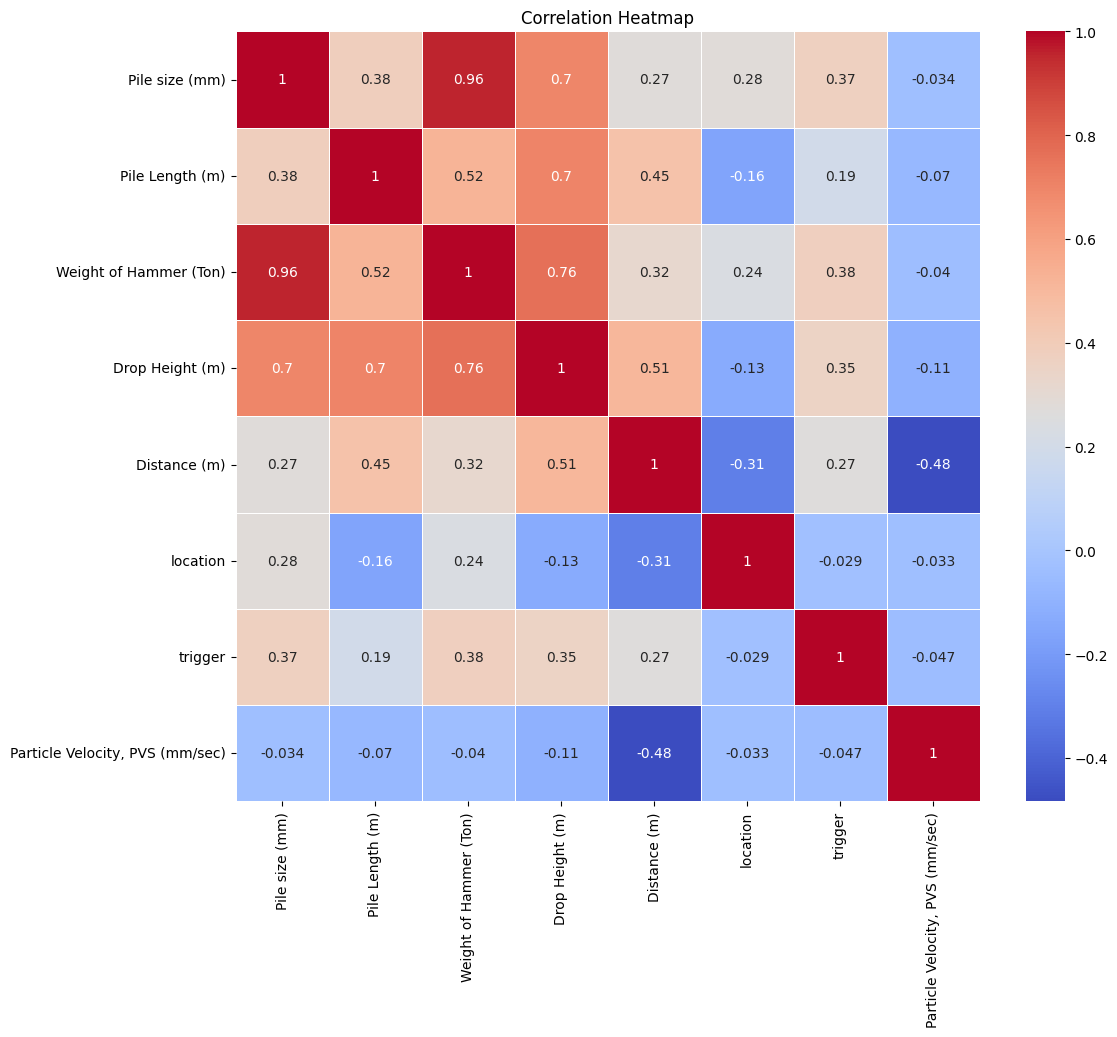

NameError: name 'y_true' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import seaborn as sns
import lime
import lime.lime_tabular
import copy
# Prepare data for LIME
feature_names = data.columns[:7].tolist()
class_names = ["Output"]

# Create a wrapper function for the model to use with LIME
def model_predict(input_data):
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(input_data, dtype=torch.float32).to(device)
        output = model(input_tensor)
    return output.cpu().numpy()

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train.cpu().numpy(),
    feature_names=feature_names,
    class_names=class_names,
    mode="regression"
)

# Generate LIME explanations for multiple samples
num_samples = 5
fig, axes = plt.subplots(num_samples, 1, figsize=(15, 5 * num_samples))
fig.suptitle("LIME Explanations for Multiple Samples", fontsize=16)

for i in range(num_samples):
    sample_idx = i
    explanation = explainer.explain_instance(
        X_test[sample_idx].cpu().numpy(),
        model_predict,
        num_features=len(feature_names)
    )

    # Create a new figure for the explanation
    exp_fig = explanation.as_pyplot_figure()

    # Clear the existing subplot
    axes[i].clear()

    # Copy the contents of exp_fig to our subplot
    for ax in exp_fig.get_axes():
        for element in ax.get_children():
            if isinstance(element, plt.Rectangle):
                axes[i].add_patch(plt.Rectangle(element.get_xy(), element.get_width(), element.get_height(),
                                                facecolor=element.get_facecolor(), edgecolor=element.get_edgecolor()))
            else:
                try:
                    new_element = copy.copy(element)
                    axes[i].add_artist(new_element)
                except:
                    print(f"Couldn't copy element of type {type(element)}")

    # Copy the x and y axis limits and labels
    axes[i].set_xlim(ax.get_xlim())
    axes[i].set_ylim(ax.get_ylim())
    axes[i].set_xlabel(ax.get_xlabel())
    axes[i].set_ylabel(ax.get_ylabel())

    axes[i].set_title(f"LIME Explanation for Sample {sample_idx}")

    # Close the figure to free up memory
    plt.close(exp_fig)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate suptitle
plt.show()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate suptitle
plt.show()

# Feature importance across all samples
feature_importance = {name: 0 for name in feature_names}
num_samples = len(X_test)

def get_feature_name(lime_feature):
    for feature in feature_names:
        if feature in lime_feature:
            return feature
    return None

for i in range(num_samples):
    explanation = explainer.explain_instance(
        X_test[i].cpu().numpy(),
        model_predict,
        num_features=len(feature_names)
    )
    for lime_feature, importance in explanation.as_list():
        feature = get_feature_name(lime_feature)
        if feature:
            feature_importance[feature] += abs(importance)

# Normalize feature importance
for feature in feature_importance:
    feature_importance[feature] /= num_samples

# Sort feature importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Plot overall feature importance
plt.figure(figsize=(12, 6))
features, importances = zip(*sorted_importance)
sns.barplot(x=list(importances), y=list(features))
plt.title("Overall Feature Importance")
plt.xlabel("Average Absolute Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of predictions vs actual values
plt.figure(figsize=(12, 6))
sns.histplot(y_true.flatten(), kde=True, label='Actual', color='blue', alpha=0.5)
sns.histplot(y_pred.flatten(), kde=True, label='Predicted', color='red', alpha=0.5)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.show()


In [ ]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00


Shape of shap_values: (52, 7, 1)
Shape of X_test[:100]: torch.Size([52, 7])
Number of features: 7
Updated shape of shap_values: (52, 7)


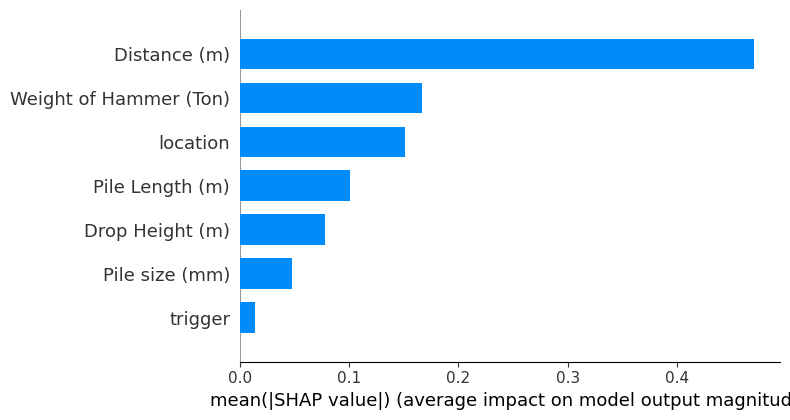

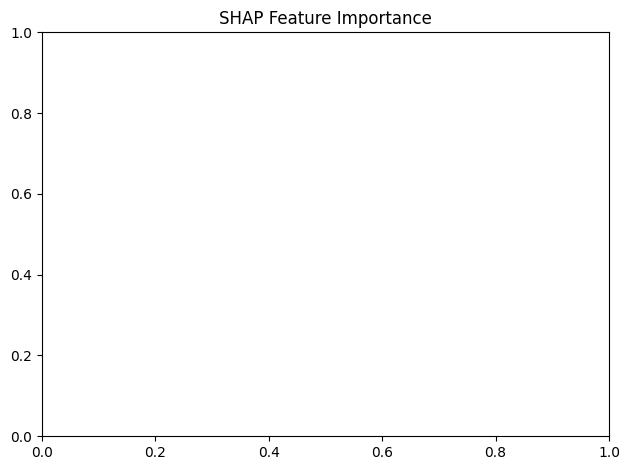

<Figure size 1000x600 with 0 Axes>

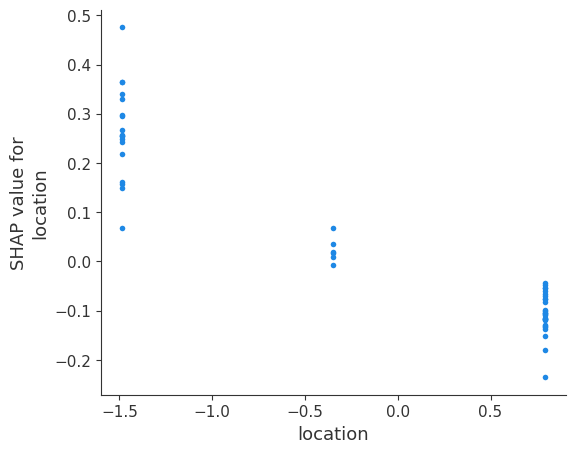

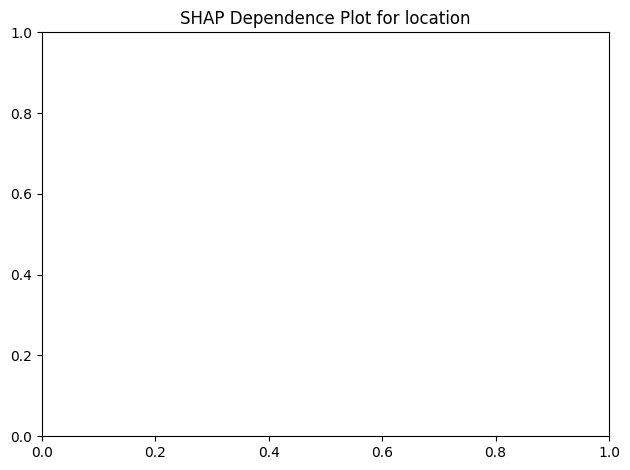

<Figure size 1000x600 with 0 Axes>

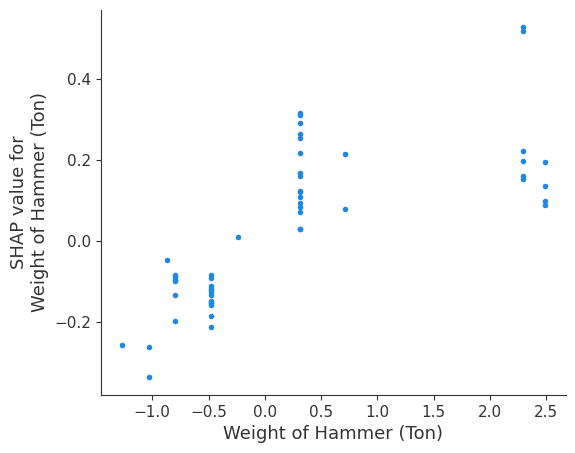

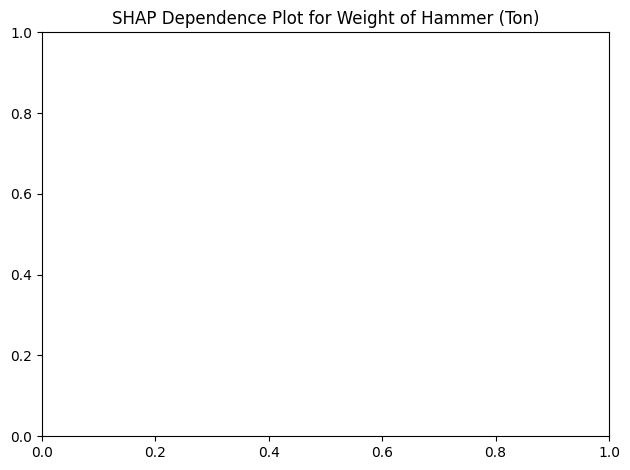

<Figure size 1000x600 with 0 Axes>

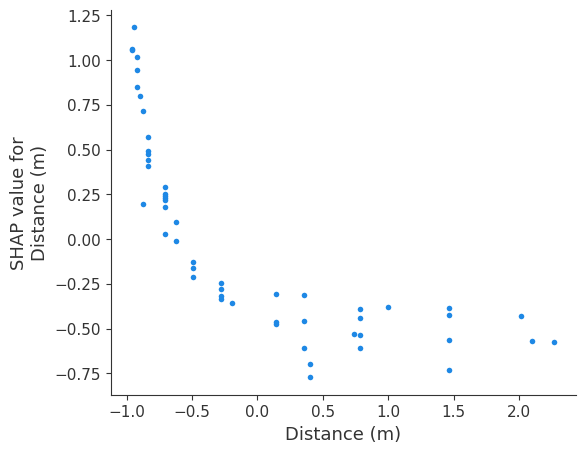

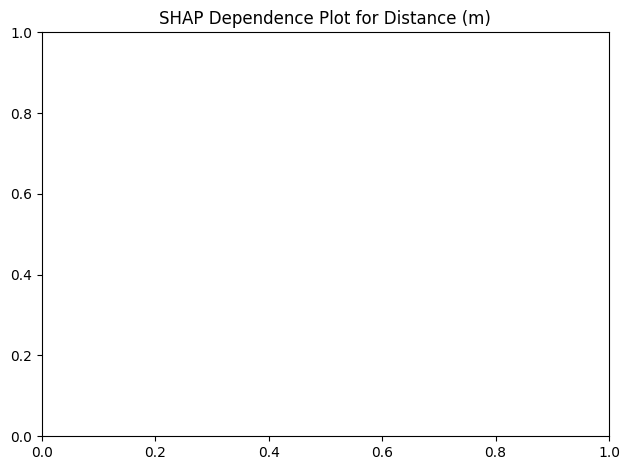


Feature Importance:
                  feature  importance
4            Distance (m)   45.771576
2  Weight of Hammer (Ton)   16.185967
5                location   14.664934
1         Pile Length (m)    9.826578
3         Drop Height (m)    7.549470
0          Pile size (mm)    4.631771
6                 trigger    1.369704


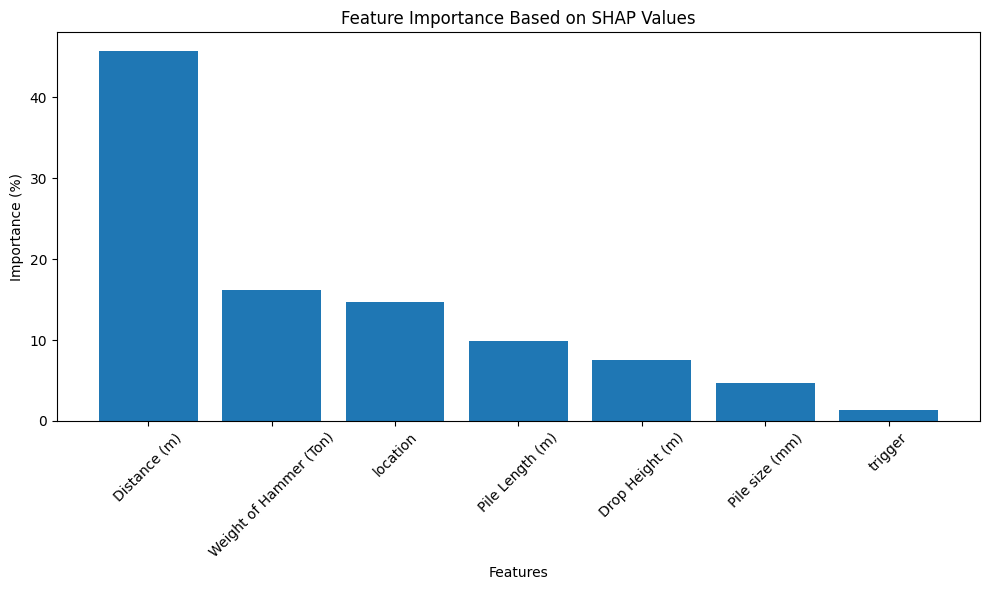

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import shap

# ... [Previous code remains the same up to the SHAP analysis part]

# XAI: SHAP values using GradientExplainer
background = X_train[:100].to(device)  # Use a subset of training data as background
test_samples = X_test[:100].to(device)  # Use a subset of test data for explanation

# Create the SHAP explainer
explainer = shap.GradientExplainer(model, background)

# Calculate SHAP values
shap_values = explainer.shap_values(test_samples)

# Print debugging information
print("Shape of shap_values:", np.array(shap_values).shape)
print("Shape of X_test[:100]:", X_test[:100].shape)
print("Number of features:", len(data.columns[:7]))

# Reshape SHAP values to match input data
shap_values = np.array(shap_values).reshape(-1, 7)

# Print updated shape
print("Updated shape of shap_values:", shap_values.shape)

try:
    # Plot SHAP summary
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test.cpu().numpy()[:100], plot_type="bar", feature_names=data.columns[:7])
    plt.title("SHAP Feature Importance")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in plotting SHAP summary: {e}")

# Calculate feature importance
feature_importance = np.abs(shap_values).mean(0)
top_features = np.argsort(feature_importance)[-3:]

# Plot SHAP dependence plots for top 3 features
for feature in top_features:
    try:
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature,
            shap_values,
            X_test.cpu().numpy()[:100],
            feature_names=data.columns[:7],
            interaction_index=None  # Set to None to avoid errors if interaction feature is not found
        )
        plt.title(f"SHAP Dependence Plot for {data.columns[feature]}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in plotting dependence plot for feature {data.columns[feature]}: {e}")

# Feature importance based on SHAP values
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
importance_df = pd.DataFrame({'feature': data.columns[:7], 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.title("Feature Importance Based on SHAP Values")
plt.xlabel("Features")
plt.ylabel("Importance (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MAPE: 20.8559%


In [ ]:
#predict using model
input= np.array([300,18,4.2,0.5,100,1,2]) #input value
inputx = np.reshape(input, (1, 7))
X_test1 = scaler.transform(inputx).astype(np.float32)
X_test1 =torch.from_numpy(X_test1)

with torch.no_grad():

    test_outputs = model(X_test1)
    # Inverse transform using the scaler
    test_outputs2 = scaler2.inverse_transform(test_outputs.cpu())

print(test_outputs2)

[[0.25586981]]


In [ ]:
pip install scikit-learn==1.5.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:

# prompt: save mode torch.jit save and scaler

# Save the model
torch.jit.save(torch.jit.script(model), 'model.pt')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(scaler2, 'scaler2.pkl')


['scaler2.pkl']

In [ ]:
# Load the model and scalers in a separate script or notebook
loaded_model = torch.jit.load('peak5_model.pt')
loaded_scaler1 = joblib.load('scaler1.joblib')
loaded_scaler2 = joblib.load('scaler2.joblib')

# Example usage for prediction
input = np.array([300, 18, 4.2, 0.5, 100, 1, 2])  # Input value
inputx = np.reshape(input, (1, 7))
X_test1 = loaded_scaler1.transform(inputx).astype(np.float32)
X_test1 = torch.from_numpy(X_test1)

with torch.no_grad():
    test_outputs = loaded_model(X_test1)
    test_outputs2 = loaded_scaler2.inverse_transform(test_outputs.cpu())

print(test_outputs2)

[[0.30558916]]


Mean Squared Error: 0.2763
MAPE: 27.8549%
Mean Absolute Error: 0.3152


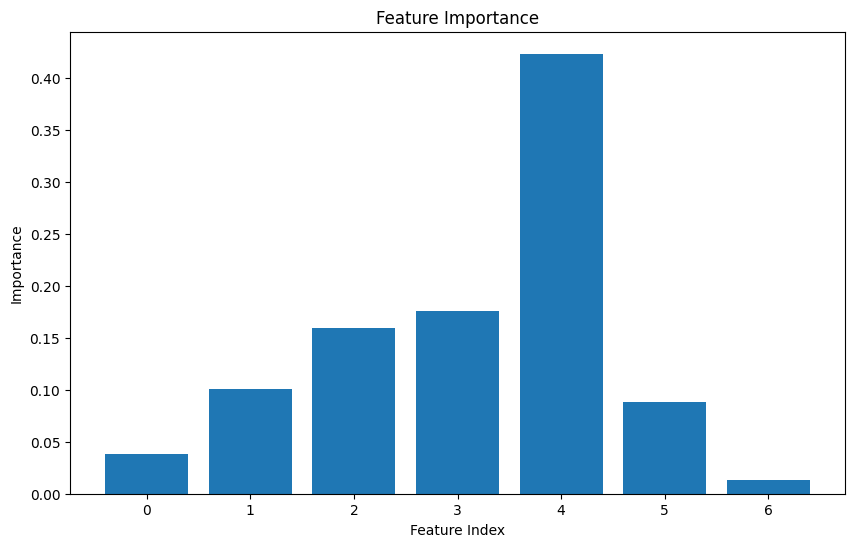

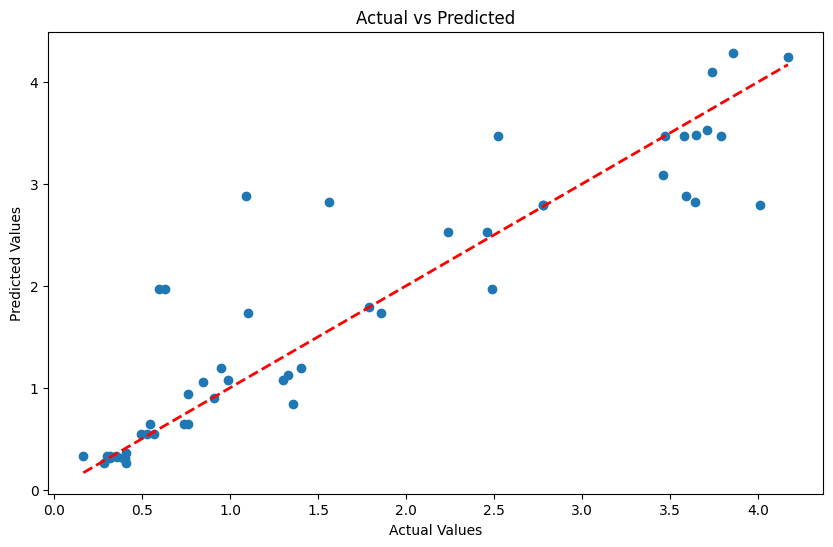

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")
3
# Split data into features and labels
X = data.iloc[:, :7].to_numpy() # Features
y = data.iloc[:, 7].to_numpy() # Labels

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=70)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=70)
y_test_noscale = y_test # Keep a copy of unscaled y_test for MAPE calculation
x_test_noscale = X_test

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train the XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test_noscale, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAPE
mape = np.mean(np.abs((y_test_noscale - y_pred) / y_test_noscale)) * 100
print(f"MAPE: {mape:.4f}%")

# Calculate MAE
mae = mean_absolute_error(y_test_noscale, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_noscale, y_pred)
plt.plot([y_test_noscale.min(), y_test_noscale.max()], [y_test_noscale.min(), y_test_noscale.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


Mean Squared Error: 0.2975
MAPE: 28.9889%
Mean Absolute Error: 0.3307


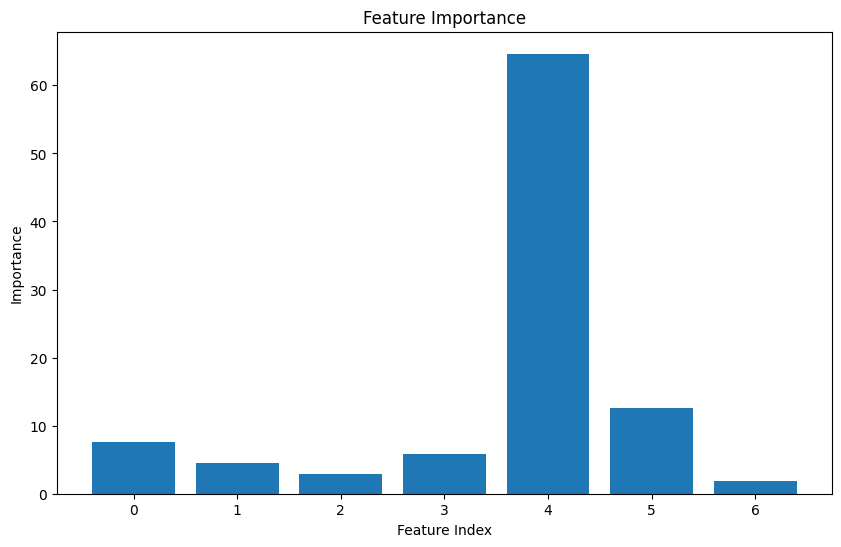

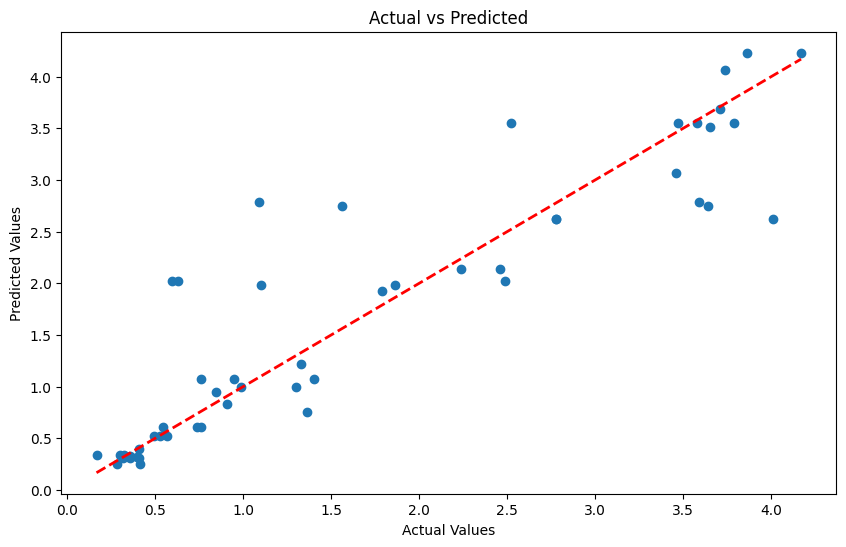

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Load Excel data
data = pd.read_excel("/content/peak5.xlsx")

# Split data into features and labels
X = data.iloc[:, :7].to_numpy()  # Features
y = data.iloc[:, 7].to_numpy()  # Labels

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=70)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=70)

y_test_noscale = y_test  # Keep a copy of unscaled y_test for MAPE calculation
x_test_noscale = X_test

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train the CatBoost model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=5,
    random_seed=42,
    verbose=False
)
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test_noscale, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate MAPE
mape = np.mean(np.abs((y_test_noscale - y_pred) / y_test_noscale)) * 100
print(f"MAPE: {mape:.4f}%")

# Calculate MAE
mae = mean_absolute_error(y_test_noscale, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_noscale, y_pred)
plt.plot([y_test_noscale.min(), y_test_noscale.max()], [y_test_noscale.min(), y_test_noscale.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()